In [1]:
import sys; sys.path.insert(0, '../../../AnaTreesPackage/notebooks'); sys.path.insert(0, '../');
from ccqe_notebook_tools import *
from tracking_tools import *
from notebooks_tools import * 
from scipy.optimize import curve_fit
%matplotlib inline
from IPython.core.display import HTML,display
display(HTML("<style>.container { width:100% !important; }</style>"))

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Welcome to ROOTaaS 6.06/02



RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Error in <TProtoClass::FindDataMember>: data member with index 0 is not found in class locale
Error in <CreateRealData>: Cannot find data member # 0 of class locale for parent cumputeAnaTree!


In [2]:
GENIECC1p = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/ccqe_candidates/ccqe_candidates_GENIECC1p_MCC8_MC_BNB_extBNB.csv')
print len(GENIECC1p),'total CC1p',(100*float(len(GENIECC1p))/len(GENIECC1p)),'%'
GENIECC1pIsVertexContained = GENIECC1p[GENIECC1p.IsVertexContained==True]
print len(GENIECC1pIsVertexContained),'contained',(100*float(len(GENIECC1pIsVertexContained))/len(GENIECC1p)),'%'
GENIECC1pIsVertexReconstructed = GENIECC1pIsVertexContained[GENIECC1pIsVertexContained.IsVertexReconstructed==True]
print len(GENIECC1pIsVertexReconstructed),'tracks reconstructed',(100*float(len(GENIECC1pIsVertexReconstructed))/len(GENIECC1p)),'%'
GENIECC1p_in_close_proximity = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['distance']<11]
print len(GENIECC1p_in_close_proximity),'tracks reconstructed with a separation distance below 11 cm',(100*float(len(GENIECC1p_in_close_proximity))/len(GENIECC1p)),'%'
GENIECC1p_in_FV = sample_in_FV( GENIECC1pIsVertexReconstructed )
print len(GENIECC1p_in_FV),'tracks reconstructed and contained',(100*float(len(GENIECC1p_in_FV))/len(GENIECC1p)),'%'
GENIECC1p_in_FV_close_proximity = GENIECC1p_in_FV[GENIECC1p_in_FV['distance']<11]
print len(GENIECC1p_in_FV_close_proximity),'tracks reconstructed and contained with a separation distance below 11 cm',(100*float(len(GENIECC1p_in_FV_close_proximity))/len(GENIECC1p)),'%'

12976 total CC1p 100.0 %
5299 contained 40.8369297164 %
1151 tracks reconstructed 8.87022194821 %
914 tracks reconstructed with a separation distance below 11 cm 7.04377311961 %
904 tracks reconstructed and contained 6.96670776819 %
745 tracks reconstructed and contained with a separation distance below 11 cm 5.74136868064 %


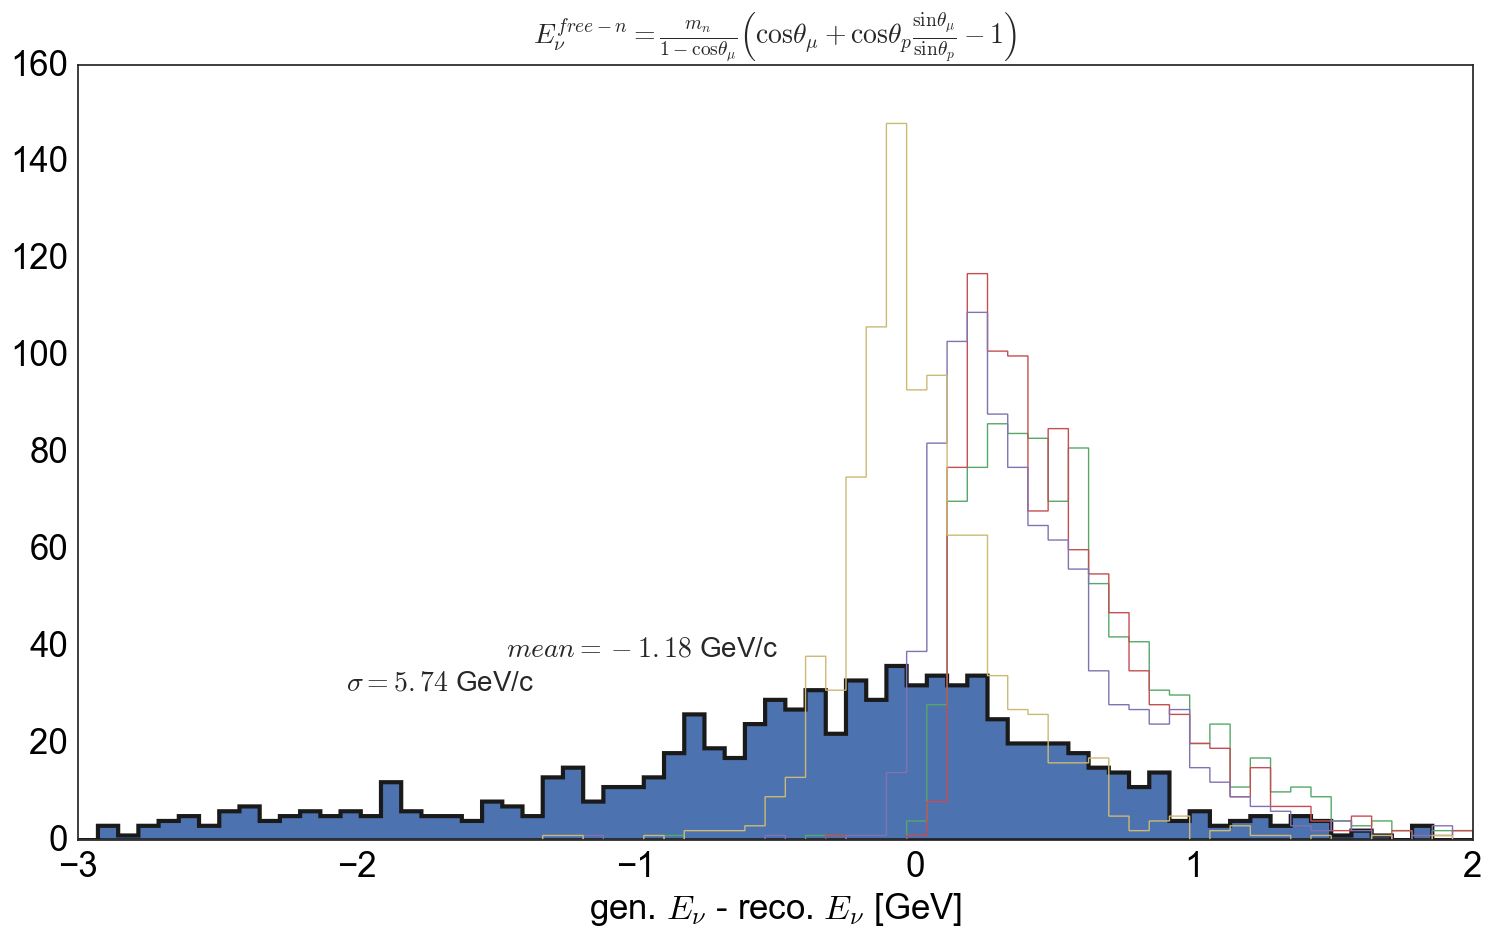

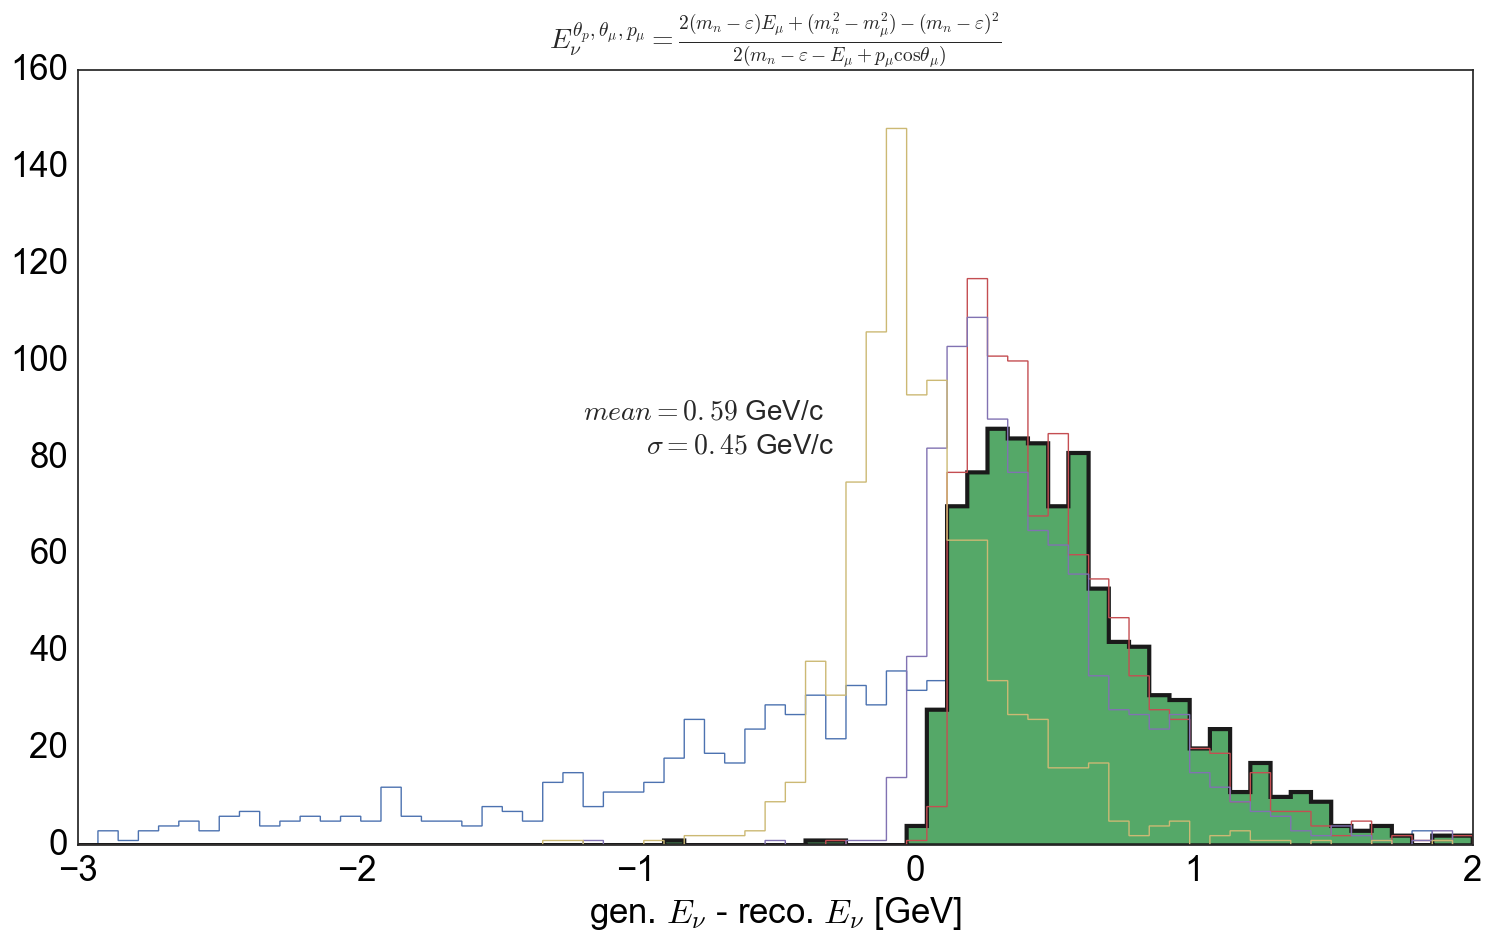

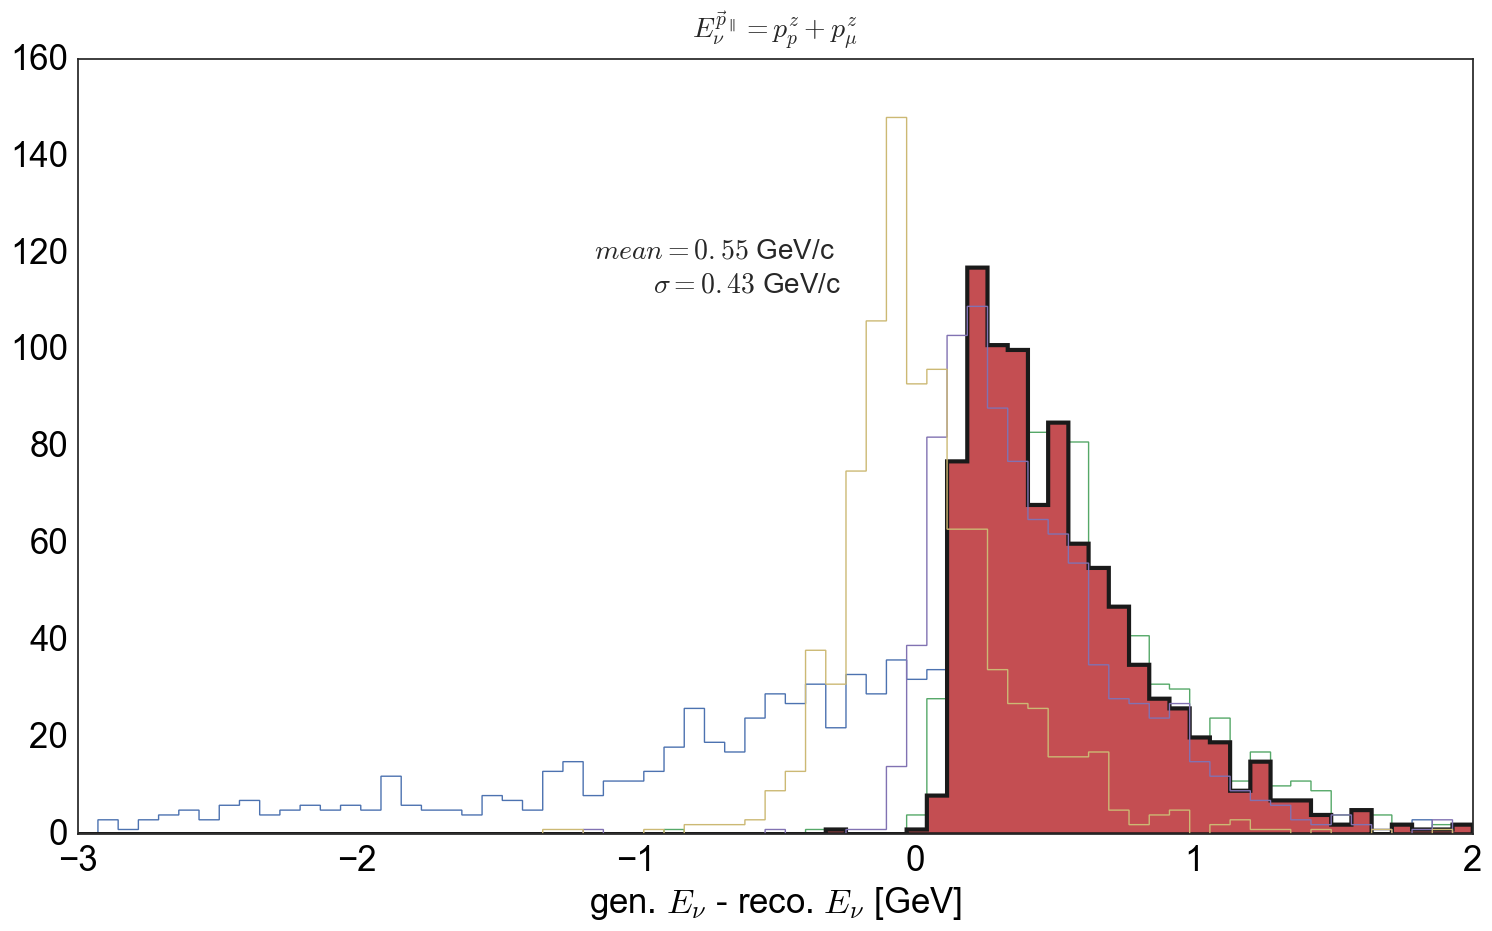

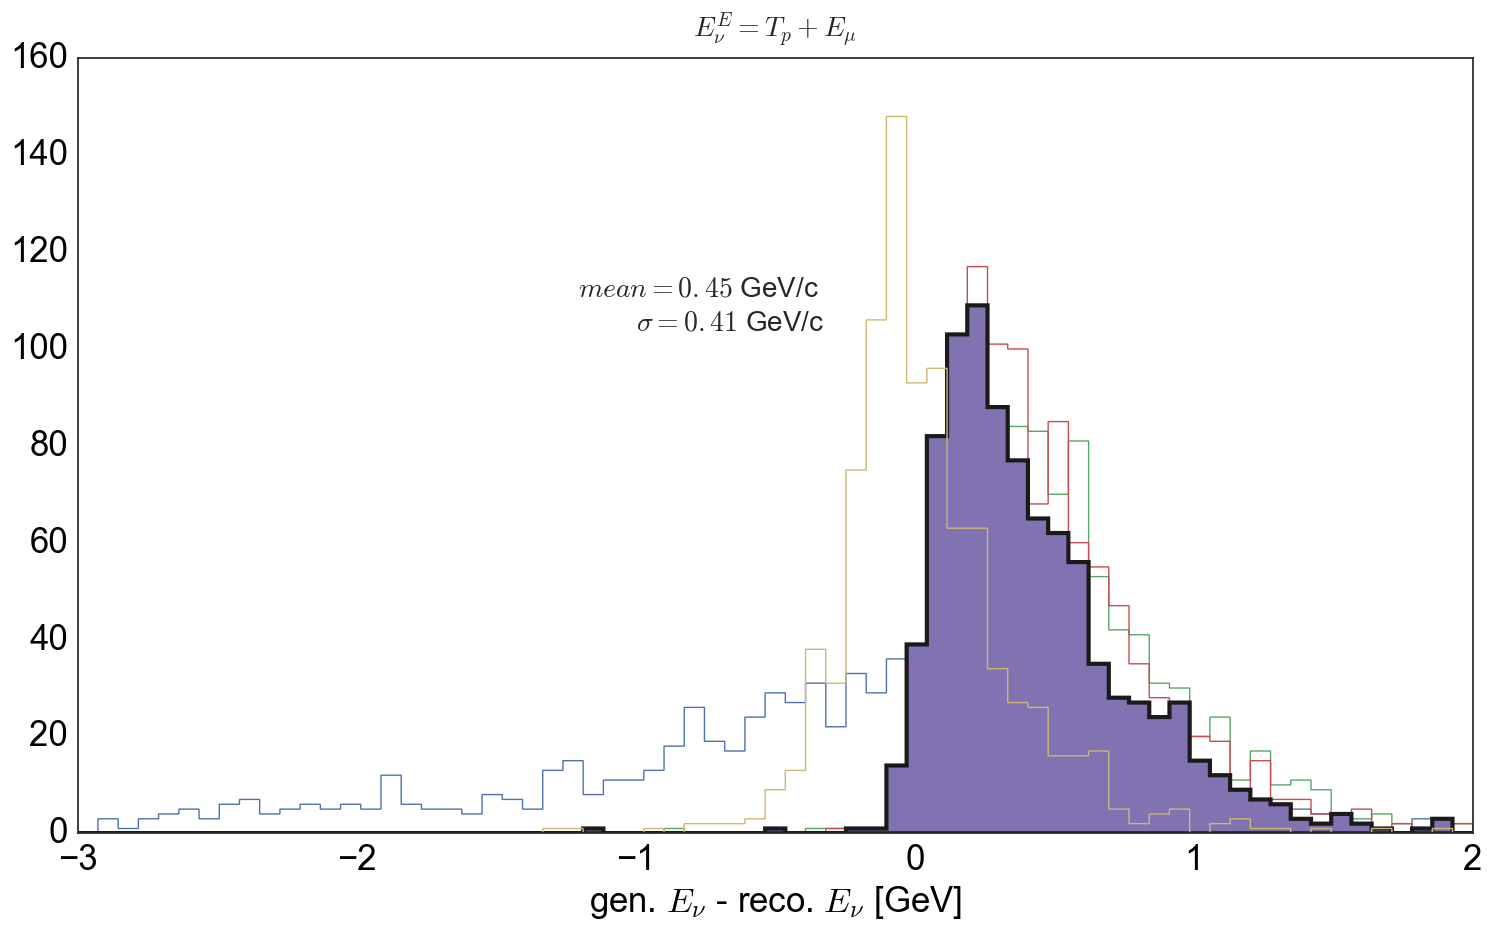

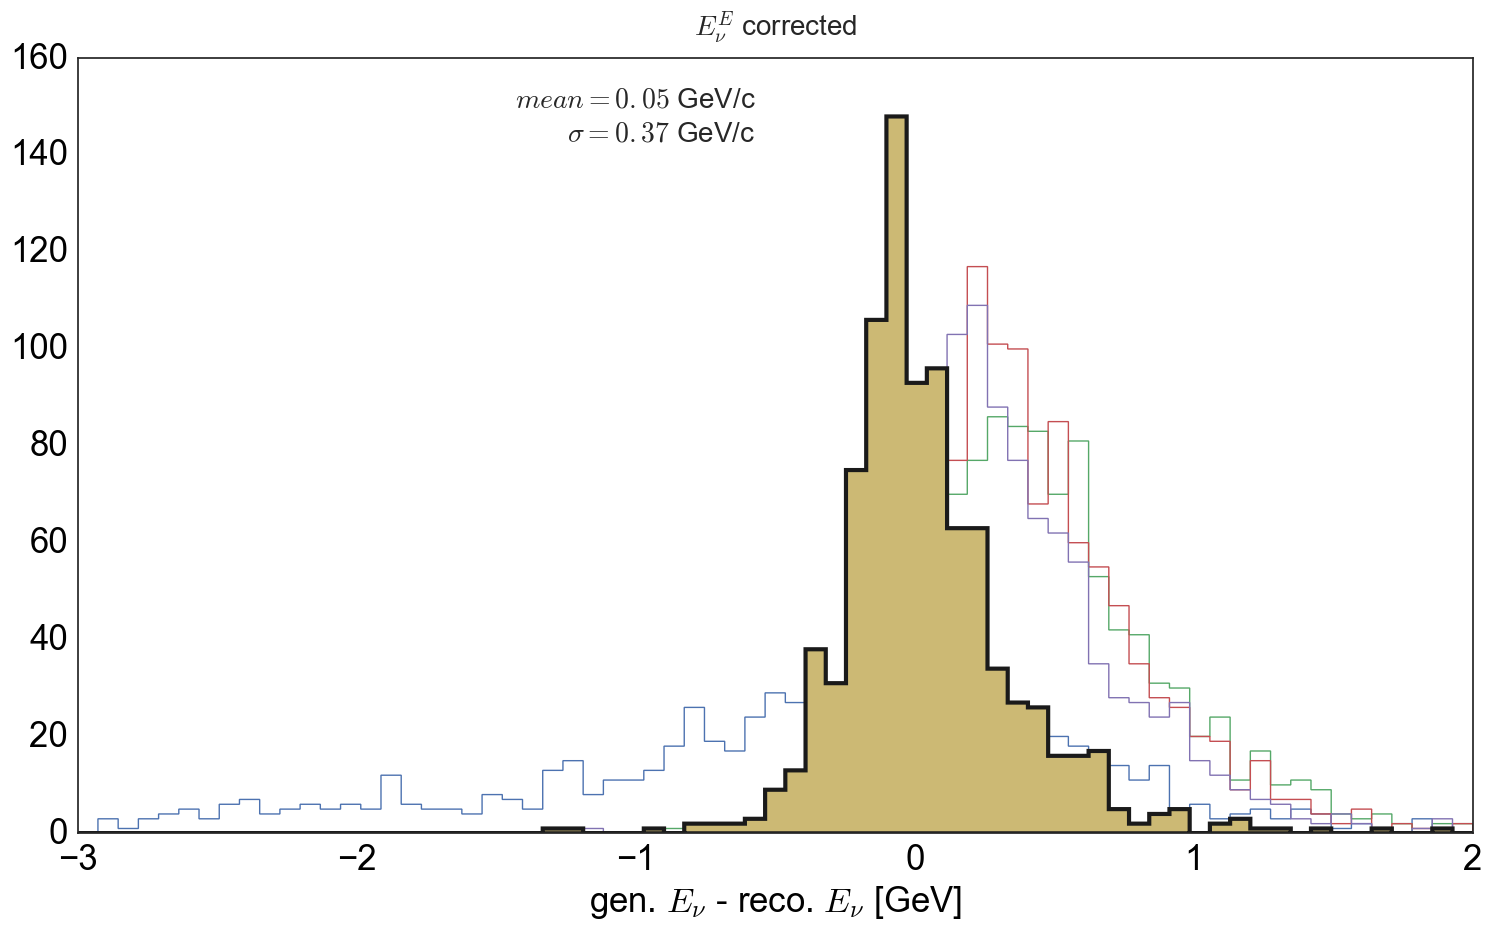

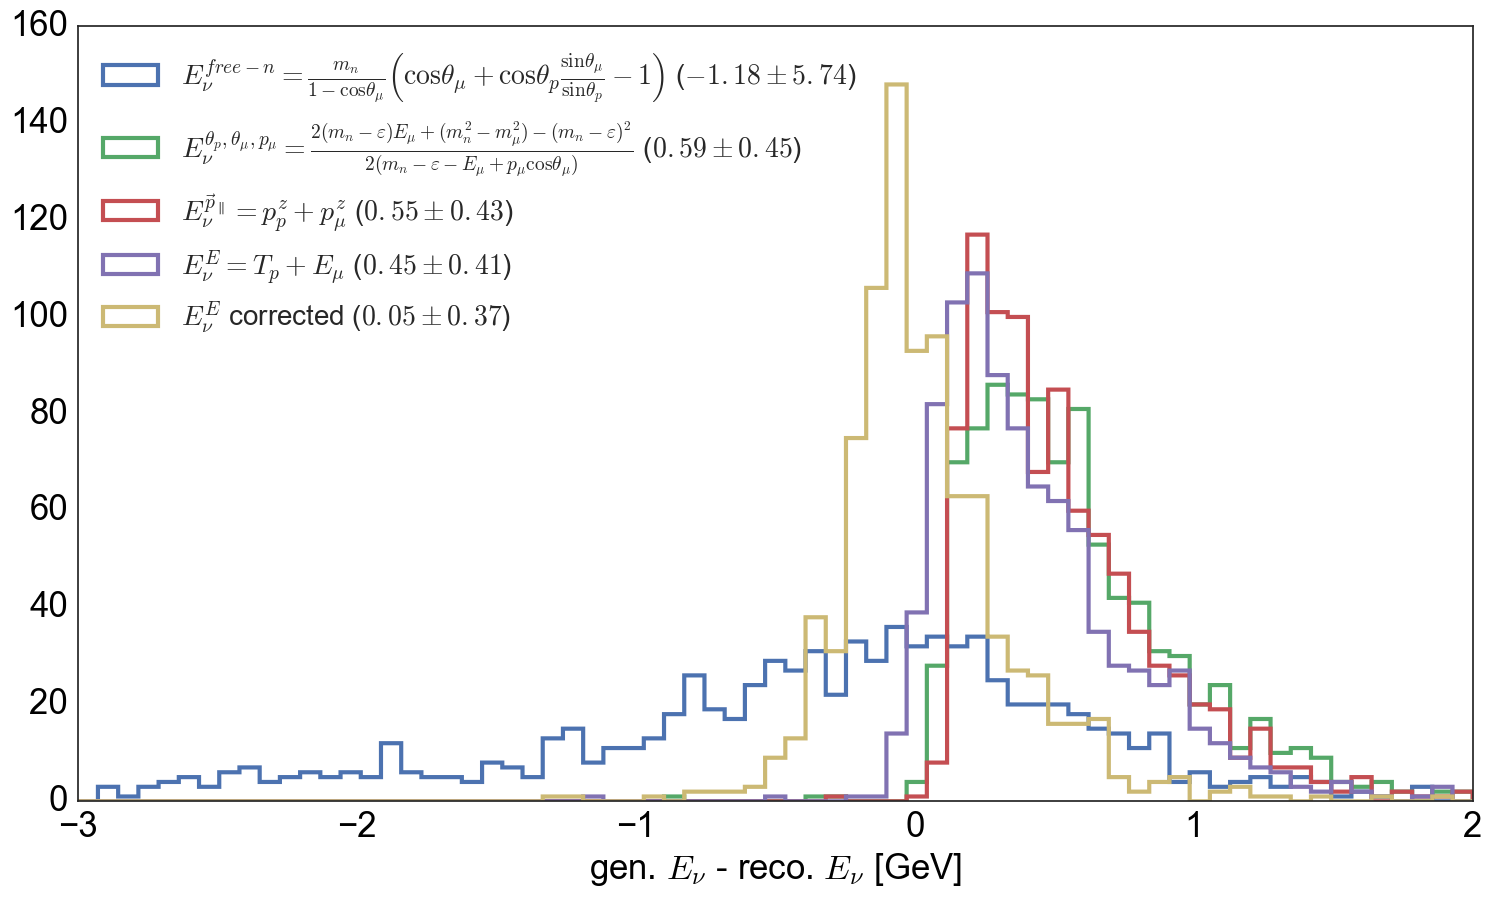

In [22]:
reco_vars = [ 'reco_CC1p_Ev_from_angles'
             ,'reco_CC1p_Ev_with_binding'
             ,'reco_CC1p_Ev_fromE'
             ,'reco_CC1p_Ev'              
             ,'reco_CC1p_Ev_corrected'
            ]
reco_labels = ['$E_{\\nu}^{free-n}= \\frac{m_{n}}{1-\\cos  \\theta_{\\mu} } \\left( \\cos \\theta_{\\mu} + \\cos \\theta_{p}  \\frac{\\sin \\theta_{\\mu} }{\\sin  \\theta_{p} } - 1\\right)$' 
               ,'$E_{\\nu}^{\\theta_p,\\theta_{\\mu},p_{\\mu}}= \\frac{2(m_{n}-\\varepsilon)E_{\\mu}+(m_{n}^{2}-m_{\\mu}^{2}) -(m_{n}-\\varepsilon)^{2}}{2 (m_{n} - \\varepsilon - E_{\\mu} + p_{\\mu} \\cos \\theta_{\\mu})}$' 
               ,'$E_{\\nu}^{\\vec{p}_\\parallel}=p_{p}^{z}+p_{\\mu}^{z}$' 
               ,'$E_{\\nu}^{E}=T_{p}+E_{\\mu}$'
               ,'$E_{\\nu}^{E}$ corrected'
              ]
bins = np.linspace(-3,2,70)
for i_plot in range(len(reco_vars)+1):
    fig,ax = plt.subplots(figsize=(18,10))
    for i_var,var,label in zip(range(len(reco_vars)),reco_vars,reco_labels):
        x = GENIECC1p_in_close_proximity['truth_Ev'] - GENIECC1p_in_close_proximity[var]
        histtype = 'stepfilled' if i_plot==i_var else 'step' 
        linewidth = 3 if i_plot==i_var or i_plot==len(reco_vars) else 1
        h,bins,_=plt.hist( x , label=label+' ($%.2f\\pm%.2f$)'%(np.mean(x),np.std(x)), bins=bins, histtype=histtype, linewidth=linewidth)
        
        if i_plot==i_var:             
            plt.text(np.mean(x) - (4*np.std(x) if i_plot>0 else 0.05*np.std(x)),np.max(h)+2,'$mean=%.2f$ GeV/c'%(np.mean(x)),fontsize=20)
            plt.text(np.mean(x) - (3.5*np.std(x) if i_plot>0 else 0.15*np.std(x)),np.max(h)-5,'$\\sigma=%.2f$ GeV/c'%(np.std(x)),fontsize=20)
    set_axes(ax,'gen. $E_{\\nu}$ - reco. $E_{\\nu}$ [GeV]')
    if i_plot==len(reco_vars): ax.legend(loc='upper left',fontsize=20)
    else: ax.set_title(reco_labels[i_plot],fontsize=20,y=1.02)

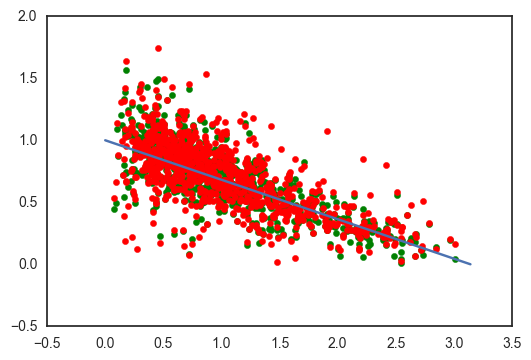

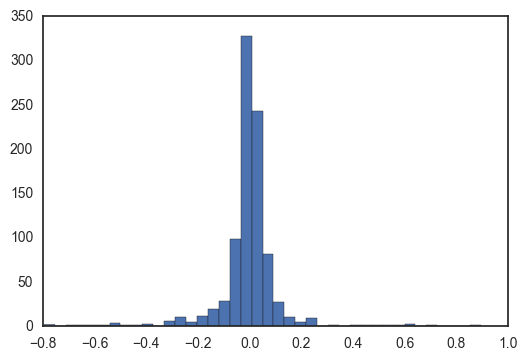

In [121]:
# print np.mean(GENIECC1pIsVertexReconstructed['truth_Ev']-GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE'])
# fig,ax=plt.subplots(figsize=(20,6))
# plt.hist(GENIECC1pIsVertexReconstructed['truth_Ev']-GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE']-0.25,bins=np.linspace(-0.2,2.,100));
# plt.hist(GENIECC1pIsVertexReconstructed['truth_Ev']-(GENIECC1pIsVertexReconstructed['truth_Ep']-0.939)-GENIECC1pIsVertexReconstructed['truth_Emu'],bins=np.linspace(-0.2,2.,100));
# np.max(GENIECC1pIsVertexReconstructed['truth_Ev']-(GENIECC1pIsVertexReconstructed['truth_Ep']-0.939)-GENIECC1pIsVertexReconstructed['truth_Emu'])
# plt.hist(GENIECC1pIsVertexReconstructed['truth_Ep']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Ep'])-0.102,bins=35);
# plt.hist(GENIECC1pIsVertexReconstructed['truth_Pmu']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_corrected']),bins=np.linspace(-0.1,2,35));
# np.mean(GENIECC1pIsVertexReconstructed['truth_Emu']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Emu']))
# h,bins,_=plt.hist(GENIECC1pIsVertexReconstructed['truth_Pmu']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu']),bins=35,alpha=0.5);
# plt.hist(GENIECC1pIsVertexReconstructed['truth_Pmu']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_corrected']),bins=bins,alpha=0.5);
# print np.mean(GENIECC1pIsVertexReconstructed['truth_Pmu']-(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_corrected']))

# what is reconstructed better - the muon or the proton theta?
plt.scatter(GENIECC1p_in_close_proximity['truth_Pmu_theta'],GENIECC1p_in_close_proximity['truth_Pp_theta'],color='green')
plt.scatter(GENIECC1p_in_close_proximity['truth_Pmu_theta'],GENIECC1p_in_close_proximity['reco_CC1p_Pp_theta'],color='red')
plt.plot([0.,np.pi],[1.,0.]) # Pp_theta = -(1./np.pi)*Pmu_theta + 1
plt.figure()
h,bins,_=plt.hist(GENIECC1p_in_close_proximity['truth_Pp_theta']-GENIECC1p_in_close_proximity['reco_CC1p_Pp_theta'],bins=40);

# # plt.scatter(GENIECC1p_in_FV_close_proximity['reco_CC1p_Pmu_theta'],GENIECC1p_in_FV_close_proximity['reco_CC1p_Pp_theta'],color='red')
# for i,row in GENIECC1p_in_FV_close_proximity.iterrows():
#     if np.abs(row['reco_CC1p_Pp_theta'] - (-(1./np.pi)*row['truth_Pmu_theta'] + 1)) > 1:
#         print 'flipping proton',row['reco_CC1p_Pp_theta']
#         GENIECC1p_in_FV_close_proximity.set_value(i,'reco_CC1p_Pp_theta', np.pi - GENIECC1p_in_FV_close_proximity.get_value(i,'reco_CC1p_Pp_theta'))
#         print row['reco_CC1p_Pp_theta']
# plt.hist(GENIECC1p_in_FV_close_proximity['truth_Pp_theta']-GENIECC1p_in_FV_close_proximity['reco_CC1p_Pp_theta'],bins=bins);
# plt.scatter(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_theta'],GENIECC1pIsVertexReconstructed['truth_Pp_theta'],color='green')
# plt.scatter(GENIECC1pIsVertexReconstructed['truth_Pmu_theta'],GENIECC1pIsVertexReconstructed['reco_CC1p_Pp_theta'],color='black')

# plt.scatter(GENIECC1p_in_FV_close_proximity['truth_Pmu_theta'],GENIECC1p_in_FV_close_proximity['reco_CC1p_Pmu_theta'],color='black')
# plt.scatter(GENIECC1p_in_FV_close_proximity['truth_Pp_theta'],GENIECC1p_in_FV_close_proximity['reco_CC1p_Pp_theta'],color='red')

good_sample = GENIECC1pIsVertexReconstructed[np.abs(GENIECC1pIsVertexReconstructed['truth_Ev']-GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE']-0.25)<0.2]
print len(good_sample),'good events'
bad_sample = GENIECC1pIsVertexReconstructed[np.abs(GENIECC1pIsVertexReconstructed['truth_Ev']-GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE']-0.25)>0.2]
print len(bad_sample),'bad events'
sample = pd.concat([good_sample,bad_sample])
##### good_sample = GENIECC1pIsVertexReconstructed[np.abs(GENIECC1pIsVertexReconstructed['truth_Emu']-GENIECC1pIsVertexReconstructed['reco_CC1p_Emu']-0.25)<0.2]
##### print len(good_sample),'good events'
##### bad_sample = GENIECC1pIsVertexReconstructed[np.abs(GENIECC1pIsVertexReconstructed['truth_Emu']-GENIECC1pIsVertexReconstructed['reco_CC1p_Emu']-0.25)>0.2]
##### print len(bad_sample),'bad events'

# Correction using p(mu) / theta(mu) correlation

In [256]:
def pow_func(x, a, b, c):
    return a*np.power(x,b) + c

def exp_func(x, a, b, c):
    return a/np.sqrt(b * x) + c


def correct_momentum(sample=None,varx='Pmu_theta',vary='Pmu',xlim=(-0.5,2.1),ylim=(-0.1,1.6)
                     ,x_label='$\\theta_{\\mu}$ [deg.]',y_label='$p_{\\mu}$ [GeV/c]'
                     ,xlim_diff=(-1,2.1), correction_type='vary + (truth - reco)' ):
    fig = plt.figure(figsize=(30,6))
    # subplot-1: truth momentum vs. truth angle
    ax = fig.add_subplot(1,5,1)
    x,y = sample['truth_'+varx],sample['truth_'+vary]
    ax.scatter(x,y,color='blue')
    set_axes(ax,'truth '+x_label,'truth '+y_label,fontsize=20)
    ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.set_ylim(ylim)
#     popt_truth, pcov = curve_fit(pow_func, x, y , (1,-0.5,0))
#     x = np.linspace(np.min(x), np.max(x), 100)
#     plt.plot(x, pow_func(x, *popt_truth), '--', c='black',linewidth=2)
    ax.set_xlim(xlim)


    # subplot-2: reconstructed momentum vs. truth angle
    ax = fig.add_subplot(1,5,2)
    x,y = sample['reco_CC1p_'+varx],sample['truth_'+vary]
    ax.scatter(x,y,color='green')
    set_axes(ax,'reco. '+x_label,'truth. '+y_label,fontsize=20)
    ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.set_ylim(ylim)
    popt, pcov = curve_fit(pow_func, x, y , (1,-0.5,0), maxfev=2000)
    x = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(x, pow_func(x, *popt), '--', c='black',linewidth=2)
    ax.set_xlim(xlim)


    
    # subplot-3: reconstructed momentum vs. reconstructed angle
    ax = fig.add_subplot(1,5,3)
    x,y = sample['reco_CC1p_'+varx],sample['reco_CC1p_'+vary]
    ax.scatter(x,y,color='blue')
    ax.scatter(sample['reco_CC1p_'+varx],sample['truth_'+vary],color='green',alpha=0.3)
    x = np.linspace(np.min(x), np.max(x), 100)
    plt.plot(x, exp_func(x, *popt), '--', c='black')
    
        
    mean_truth_vary = np.mean(sample['truth_'+vary])
    mean_reco_vary = np.mean(sample['reco_CC1p_'+vary])
    mean_diff = mean_truth_vary - mean_reco_vary

    if correction_type == 'vary + (truth - mean)':
        print 'reco_CC1p_'+vary+'_corrected = reco_CC1p_'+vary + "+(%f*power(%s , %f)+%f)"%(popt[0],'reco_CC1p_'+varx,popt[1],popt[2]) + "-(%f)"%mean_reco_vary
    elif correction_type == 'vary + mean':
        print 'reco_CC1p_'+vary+'_corrected = reco_CC1p_'+vary + "+(%f)"%mean_diff
    elif correction_type == 'vary + (truth - reco)':
        x,y = sample['reco_CC1p_'+varx],sample['reco_CC1p_'+vary]
        popt_reco, pcov = curve_fit(pow_func, x, y , (1,-0.5,0), maxfev=3000)
        x = np.linspace(np.min(x), np.max(x), 100)
        plt.plot(x, pow_func(x, *popt_reco), '--', c='purple',linewidth=2)
        print 'reco_CC1p_'+vary+'_corrected = reco_CC1p_'+vary + "+(%f*power(%s , %f)+%f)"%(popt[0],'reco_CC1p_'+varx,popt[1],popt[2]) + "-(%f*power(%s , %f)+%f)"%(popt_reco[0],'reco_CC1p_'+varx,popt_reco[1],popt_reco[2])
    elif correction_type == 'truth':
        print 'reco_CC1p_'+vary+'_corrected = ' + "%f*power(%s , %f)+%f"%(popt[0],'reco_CC1p_'+varx,popt[1],popt[2]) 
        
    for i,row in sample.iterrows():
        if correction_type == 'vary + (truth - mean)':
            sample.set_value(i,'reco_CC1p_'+vary+'_corrected' , 
                             sample.get_value(i,'reco_CC1p_'+vary) + (pow_func(sample.get_value(i,'reco_CC1p_'+varx), *popt) - mean_reco_vary))
        elif correction_type == 'vary + mean':
            sample.set_value(i,'reco_CC1p_'+vary+'_corrected' , 
                             sample.get_value(i,'reco_CC1p_'+vary) + mean_diff)
        elif correction_type == 'vary + (truth - reco)':
            sample.set_value(i,'reco_CC1p_'+vary+'_corrected' , 
                             sample.get_value(i,'reco_CC1p_'+vary) + (pow_func(sample.get_value(i,'reco_CC1p_'+varx), *popt) - pow_func(sample.get_value(i,'reco_CC1p_'+varx), *popt_reco)))
        elif correction_type == 'truth':            
            sample.set_value(i,'reco_CC1p_'+vary+'_corrected' , 
                             pow_func(sample.get_value(i,'reco_CC1p_'+varx), *popt))            

    ax.scatter(sample['reco_CC1p_'+varx],sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
    set_axes(ax,'rec. '+x_label,'rec. '+y_label,fontsize=20)
    ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)


    # subplot-4: reconstructed - generated momentum before and after correction
    ax = fig.add_subplot(1,5,4)
    ax.scatter(sample['reco_CC1p_'+varx],(sample['truth_'+vary]-sample['reco_CC1p_'+vary]),color='blue')
    ax.scatter(sample['reco_CC1p_'+varx],(sample['truth_'+vary]-sample['reco_CC1p_'+vary+'_corrected']),color='black',alpha=0.3)
    plt.plot(xlim,[0,0],'--')
    set_axes(ax,'rec. '+x_label,'gen. - rec. '+y_label,fontsize=20)
    ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.set_xlim(xlim)


    ax = fig.add_subplot(1,5,5)
    ax.set_xlim(xlim_diff)
    x = sample['truth_'+vary]-sample['reco_CC1p_'+vary]
    h,bins,_=ax.hist(x,bins=np.linspace(-1,2.1,50),label='reco. ($%.2f\\pm%.2f$)'%(np.mean(x),np.std(x)));
    x_corr = sample['truth_'+vary]-sample['reco_CC1p_'+vary+'_corrected']
    ax.hist(x_corr,bins=bins,color='black',label='corr. ($%.3f\\pm%.3f$)'%(np.mean(x_corr),np.std(x_corr)),alpha=0.5);
    set_axes(ax,'gen. - rec. '+y_label,fontsize=20)
    ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
    ax.legend(loc='upper right',fontsize=15)
    plt.tight_layout()

163 theta(mu)>pi/2
reco_CC1p_Pmu_corrected = reco_CC1p_Pmu+(239.285823*power(reco_CC1p_Pmu_theta , -0.000924)+-238.823596)-(94.431539*power(reco_CC1p_Pmu_theta , -0.000762)+-94.194473)
550 pi/6<theta(mu)<pi/2
reco_CC1p_Pmu_corrected = reco_CC1p_Pmu+(0.399575*power(reco_CC1p_Pmu_theta , -1.167177)+0.154257)-(0.098050*power(reco_CC1p_Pmu_theta , -0.762805)+0.145517)
201 theta(mu)<pi/6
reco_CC1p_Pmu_corrected = reco_CC1p_Pmu+(2487.389498*power(reco_CC1p_Pmu_theta , -0.000175)+-2486.692171)-(322.878637*power(reco_CC1p_Pmu_theta , -0.000389)+-322.613939)


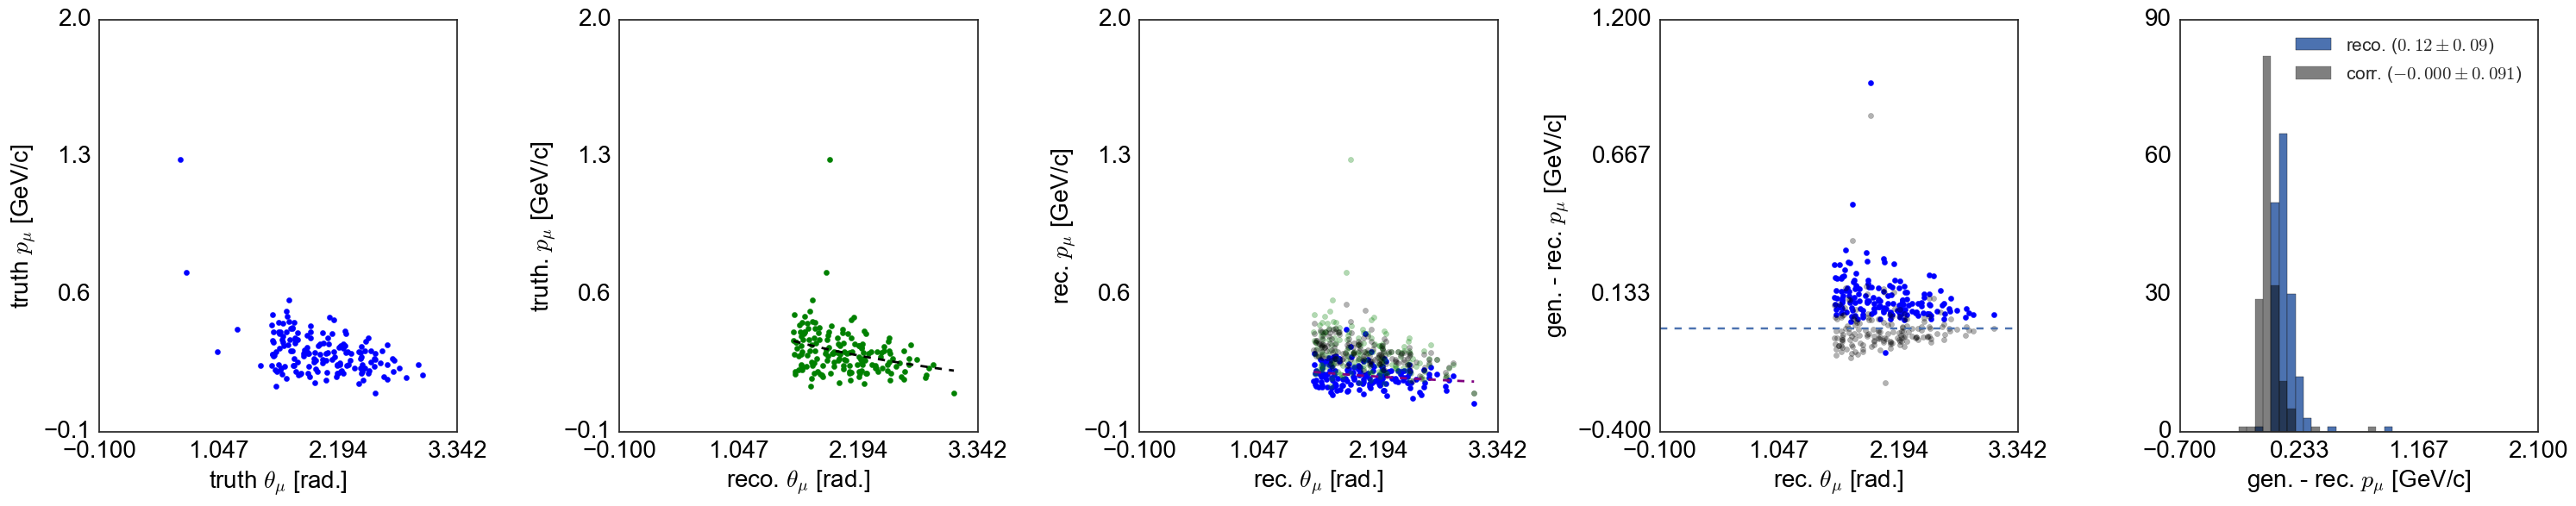

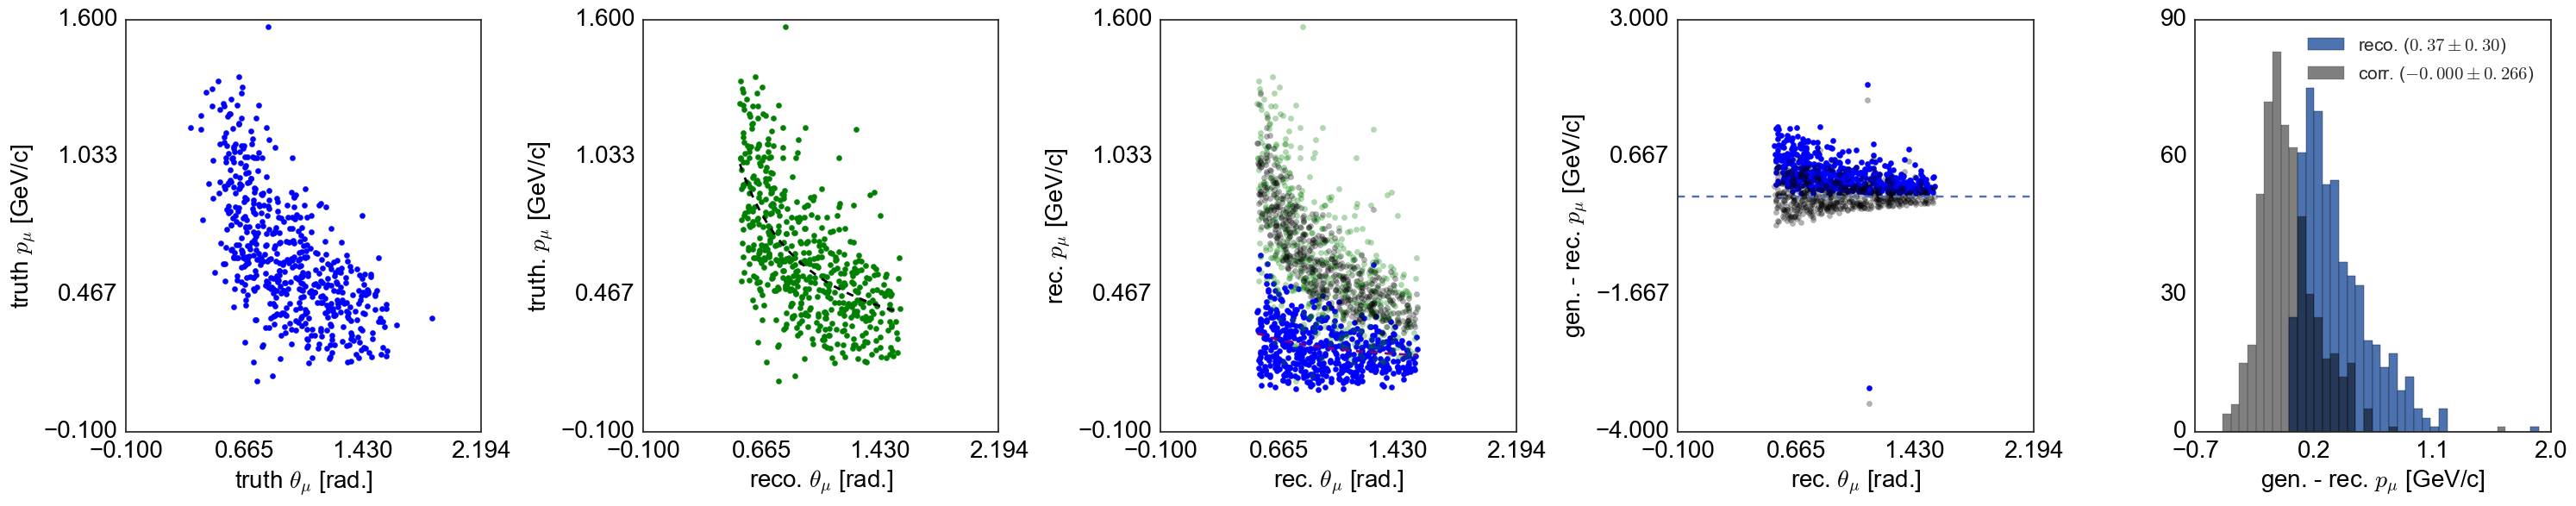

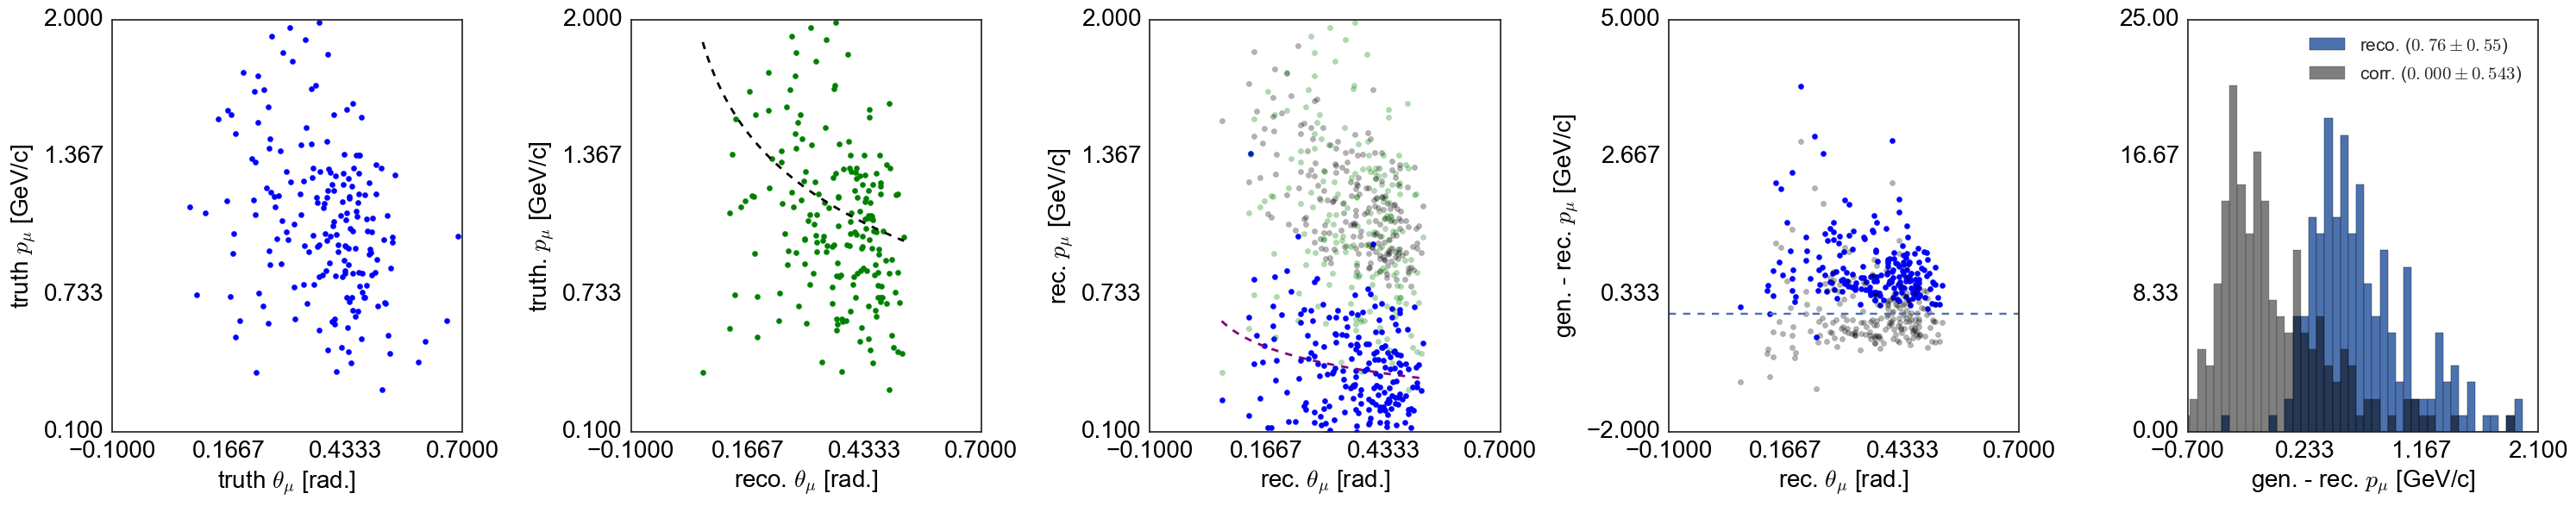

In [257]:
sample1 = GENIECC1p_in_close_proximity[GENIECC1p_in_close_proximity['reco_CC1p_Pmu_theta']>np.pi/2 ]
print len(sample1),'theta(mu)>pi/2'
correct_momentum(sample=sample1,varx='Pmu_theta',vary='Pmu',xlim=(-0.1,np.pi+0.2),ylim=(-0.1,2.),correction_type = 'vary + (truth - reco)'#'truth'
                 ,x_label='$\\theta_{\\mu}$ [rad.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2.1))
# mid. theta_mu
sample2 = GENIECC1p_in_close_proximity[(GENIECC1p_in_close_proximity['reco_CC1p_Pmu_theta']>np.pi/6)                                                    
                                      &(GENIECC1p_in_close_proximity['reco_CC1p_Pmu_theta']<np.pi/2)]
print len(sample2),'pi/6<theta(mu)<pi/2'
correct_momentum(sample=sample2,varx='Pmu_theta',vary='Pmu',xlim=(-0.1,2*np.pi/3+0.1),correction_type = 'vary + (truth - reco)'
                 ,x_label='$\\theta_{\\mu}$ [rad.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2))
# high. theta_mu
sample3 = GENIECC1p_in_close_proximity[GENIECC1p_in_close_proximity['reco_CC1p_Pmu_theta']<np.pi/6]
print len(sample3),'theta(mu)<pi/6'
correct_momentum(sample=sample3,varx='Pmu_theta',vary='Pmu',xlim=(-0.1,0.7),ylim=(0.1,2.),correction_type = 'vary + (truth - reco)'
                 ,x_label='$\\theta_{\\mu}$ [rad.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2.1))

530 theta(p)<pi/4
reco_CC1p_Pp_corrected = reco_CC1p_Pp+(829.467268*power(reco_CC1p_Pp_theta , -0.000145)+-828.787001)-(272.517358*power(reco_CC1p_Pp_theta , -0.000166)+-272.006880)
384 pi/4<theta(p)
reco_CC1p_Pp_corrected = reco_CC1p_Pp+(-373.647151*power(reco_CC1p_Pp_theta , 0.000654)+374.240938)-(-167.943634*power(reco_CC1p_Pp_theta , 0.000747)+168.395327)


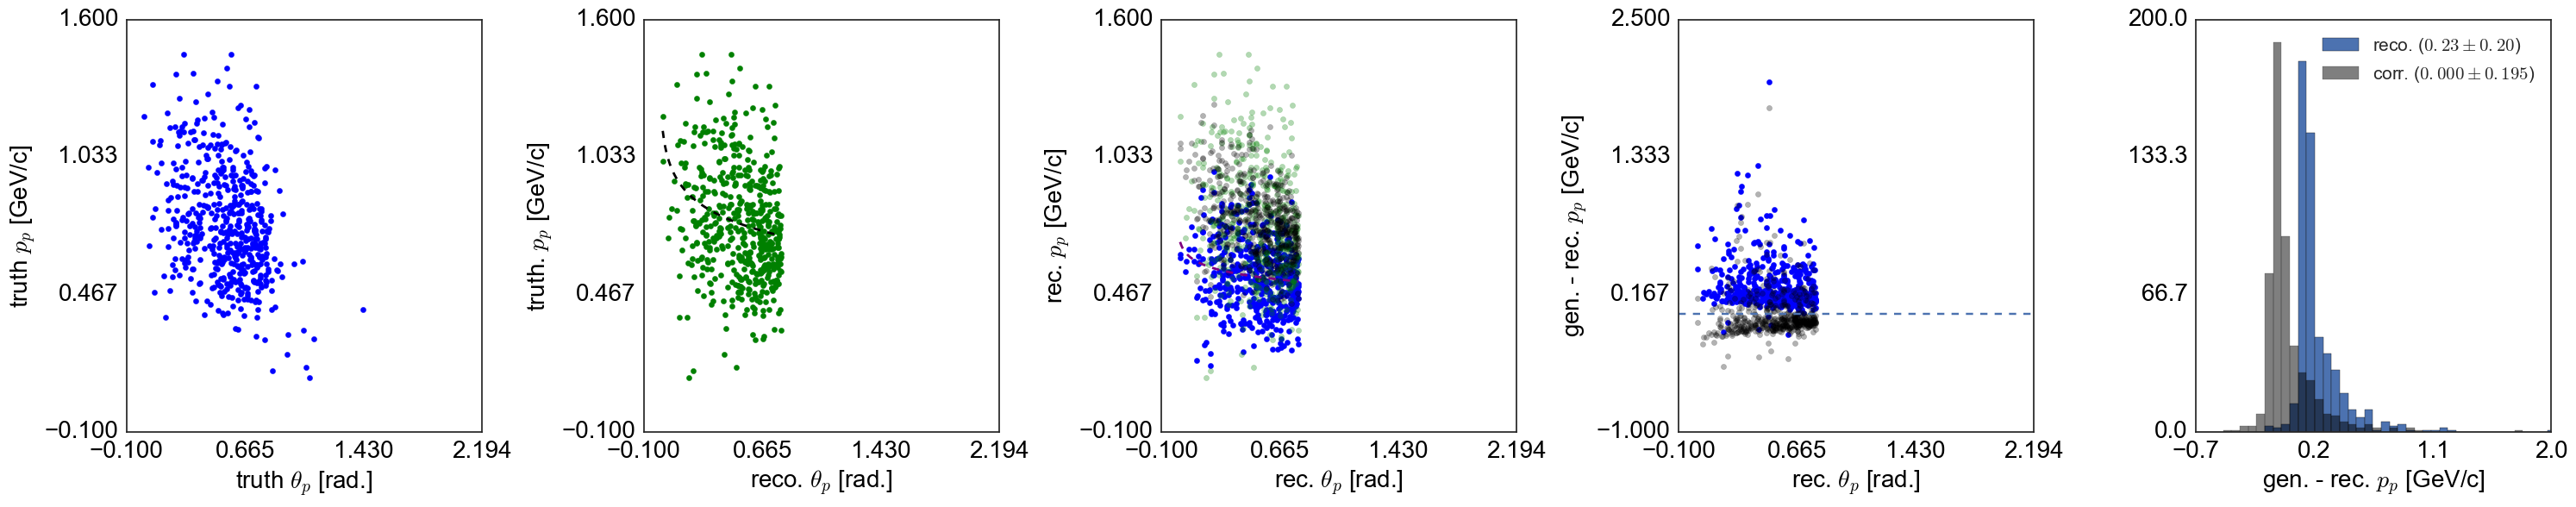

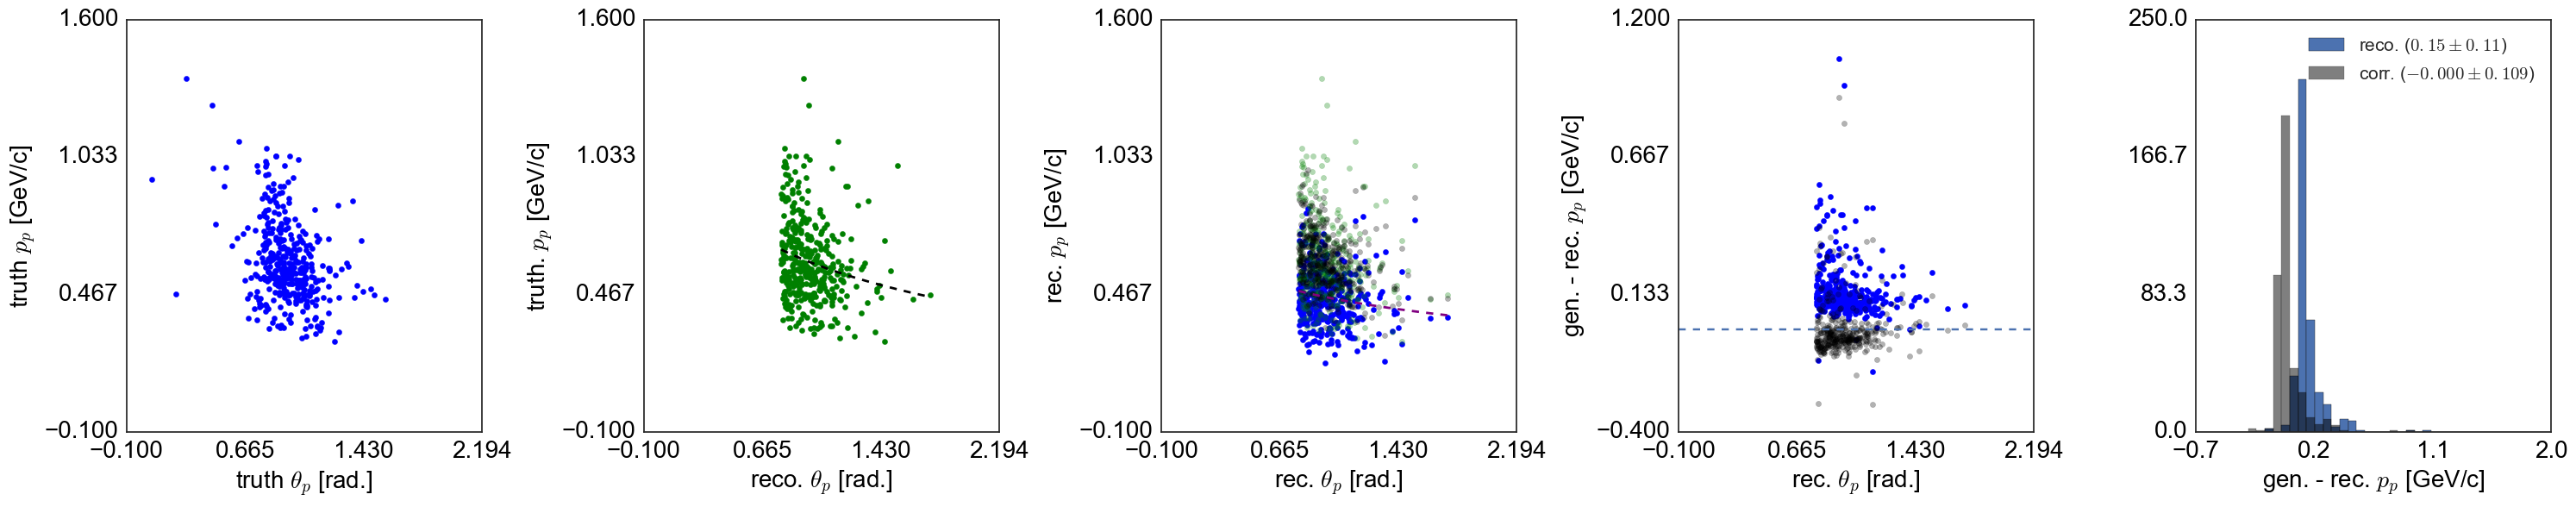

In [258]:
sample2 = GENIECC1p_in_close_proximity[(GENIECC1p_in_close_proximity['reco_CC1p_Pp_theta']<np.pi/4)]
print len(sample2),'theta(p)<pi/4'
correct_momentum(sample=sample2,varx='Pp_theta',vary='Pp',xlim=(-0.1,2*np.pi/3+0.1),correction_type = 'vary + (truth - reco)'
                 ,x_label='$\\theta_{p}$ [rad.]',y_label='$p_{p}$ [GeV/c]',xlim_diff=(-0.7,2))
sample3 = GENIECC1p_in_close_proximity[(GENIECC1p_in_close_proximity['reco_CC1p_Pp_theta']>np.pi/4)]
print len(sample3),'pi/4<theta(p)'
correct_momentum(sample=sample3,varx='Pp_theta',vary='Pp',xlim=(-0.1,2*np.pi/3+0.1),correction_type = 'vary + (truth - reco)'
                 ,x_label='$\\theta_{p}$ [rad.]',y_label='$p_{p}$ [GeV/c]',xlim_diff=(-0.7,2))


163 theta(mu)>pi/2
reco_CC1p_Pmu_corrected = reco_CC1p_Pmu_corrected+(239.285823*power(reco_CC1p_Pmu_theta , -0.000924)+-238.823596)-(94.431539*power(reco_CC1p_Pmu_theta , -0.000762)+-94.194473)


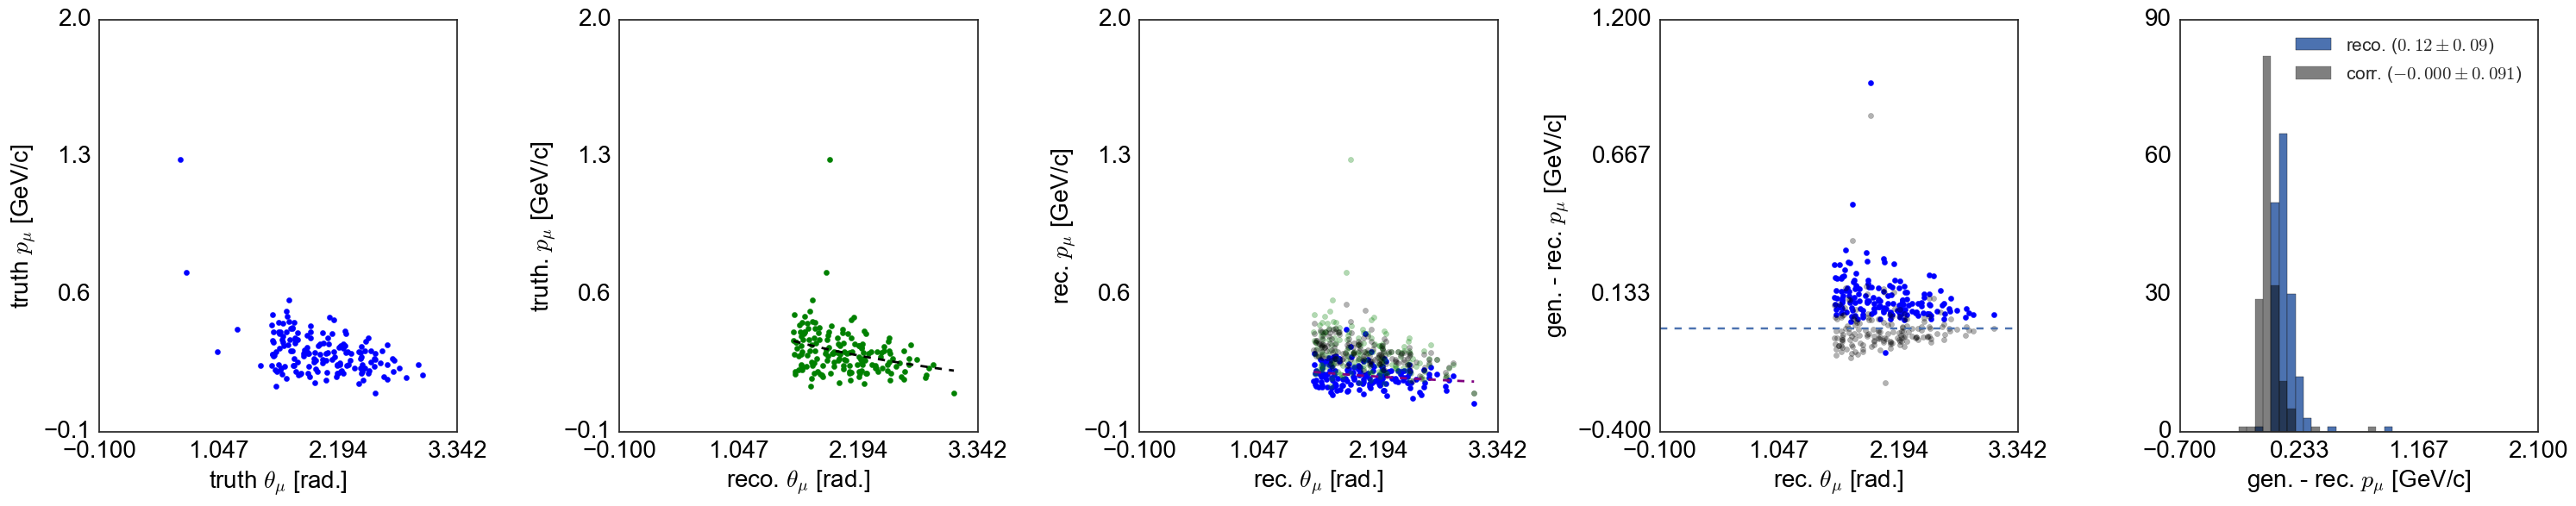

In [228]:
sample = GENIECC1p_in_close_proximity[GENIECC1p_in_close_proximity['reco_CC1p_Pmu_theta']>np.pi/2 ]
print len(sample),'theta(mu)>pi/2'
correct_momentum(sample=sample,varx='Pmu_theta',vary='Pmu',xlim=(-0.1,np.pi+0.2),ylim=(-0.1,2.),correction_type = 'vary + (truth - reco)'#'truth'
                 ,x_label='$\\theta_{\\mu}$ [rad.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2.1))

550 pi/6<theta(mu)<pi/2
reco_CC1p_Pmu_corrected = reco_CC1p_Pmu_corrected+(0.399575*power(reco_CC1p_Pmu_theta , -1.167177)+0.154257)-(0.098050*power(reco_CC1p_Pmu_theta , -0.762805)+0.145517)


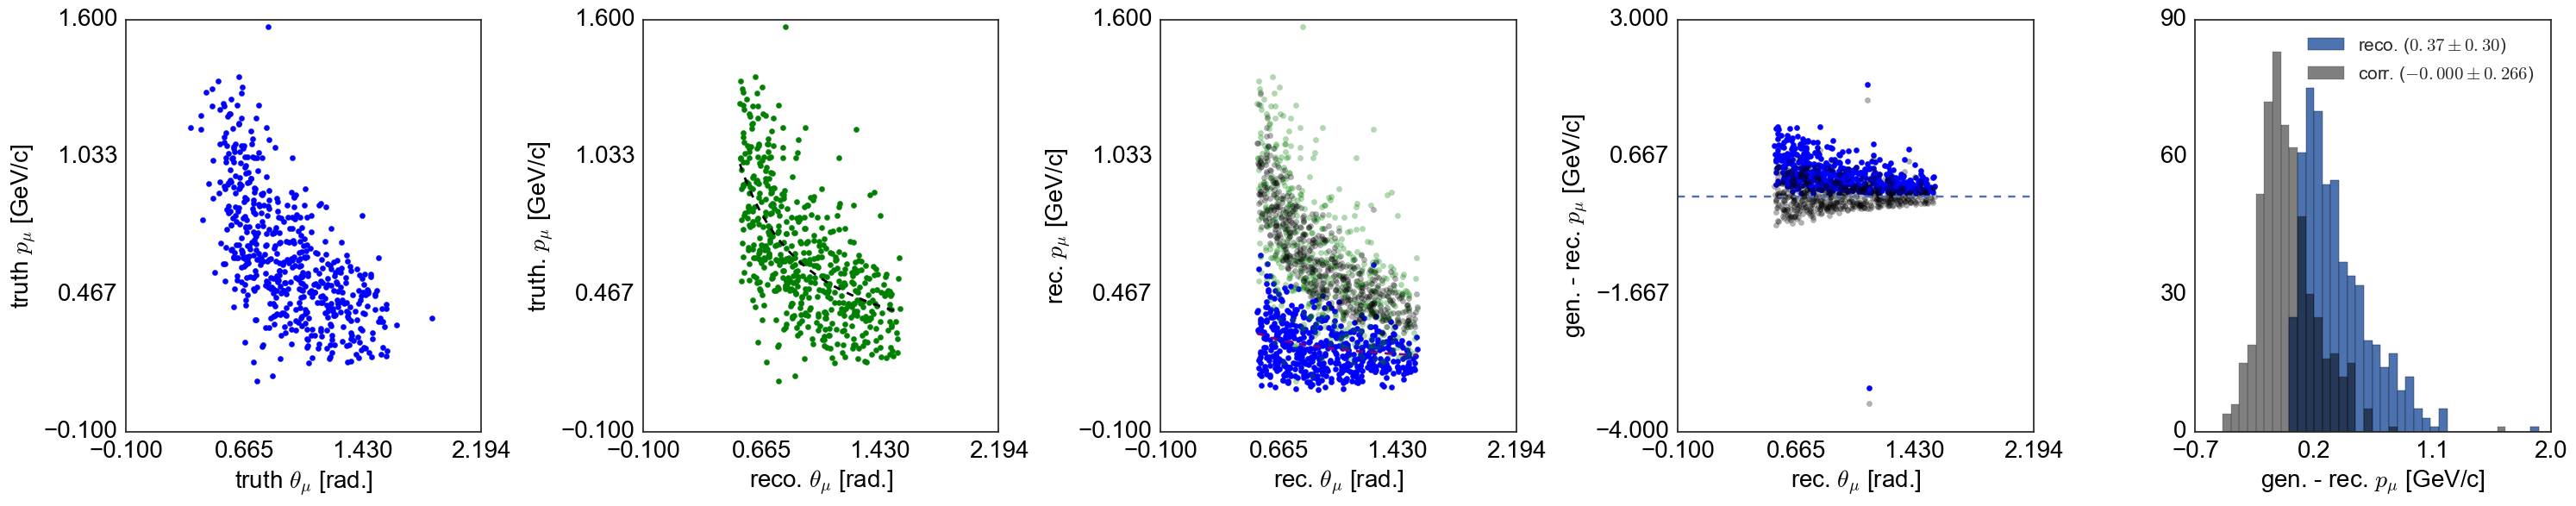

In [229]:
sample = GENIECC1p_in_close_proximity[(GENIECC1p_in_close_proximity['reco_CC1p_Pmu_theta']>np.pi/6)                                                    
                                      &(GENIECC1p_in_close_proximity['reco_CC1p_Pmu_theta']<np.pi/2)]
print len(sample),'pi/6<theta(mu)<pi/2'
correct_momentum(sample=sample,varx='Pmu_theta',vary='Pmu',xlim=(-0.1,2*np.pi/3+0.1),correction_type = 'vary + (truth - reco)'
                 ,x_label='$\\theta_{\\mu}$ [rad.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2))

201 theta(mu)<pi/6
reco_CC1p_Pmu_corrected = reco_CC1p_Pmu_corrected+(2487.389498*power(reco_CC1p_Pmu_theta , -0.000175)+-2486.692171)-(322.878637*power(reco_CC1p_Pmu_theta , -0.000389)+-322.613939)


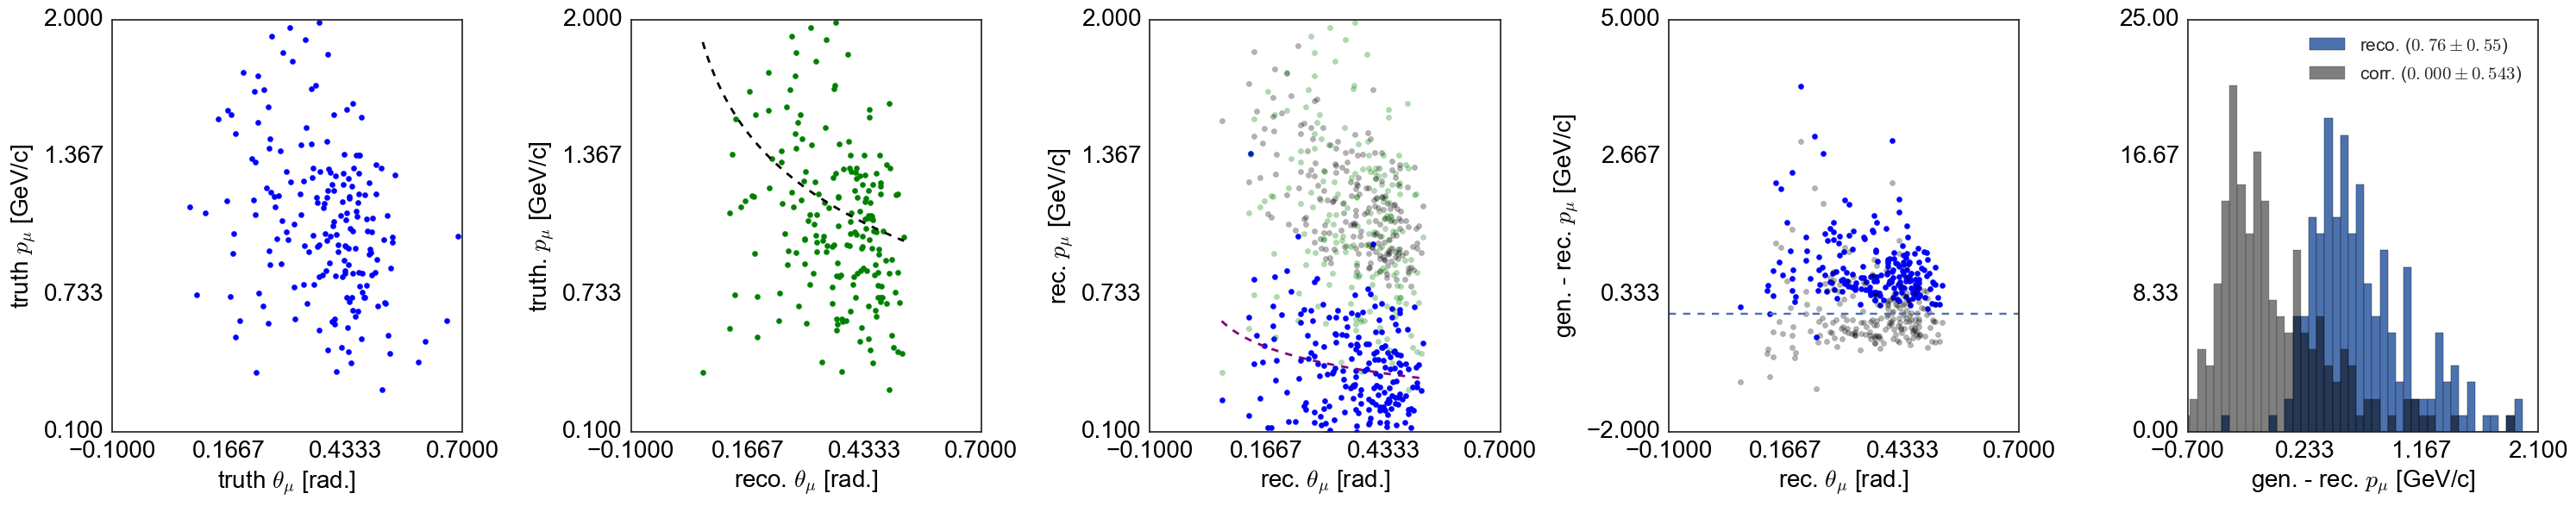

In [230]:
sample = GENIECC1p_in_close_proximity[GENIECC1p_in_close_proximity['reco_CC1p_Pmu_theta']<np.pi/6]
print len(sample),'theta(mu)<pi/6'
correct_momentum(sample=sample,varx='Pmu_theta',vary='Pmu',xlim=(-0.1,0.7),ylim=(0.1,2.),correction_type = 'vary + (truth - reco)'
                 ,x_label='$\\theta_{\\mu}$ [rad.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2.1))

891 theta(mu)<pi/2


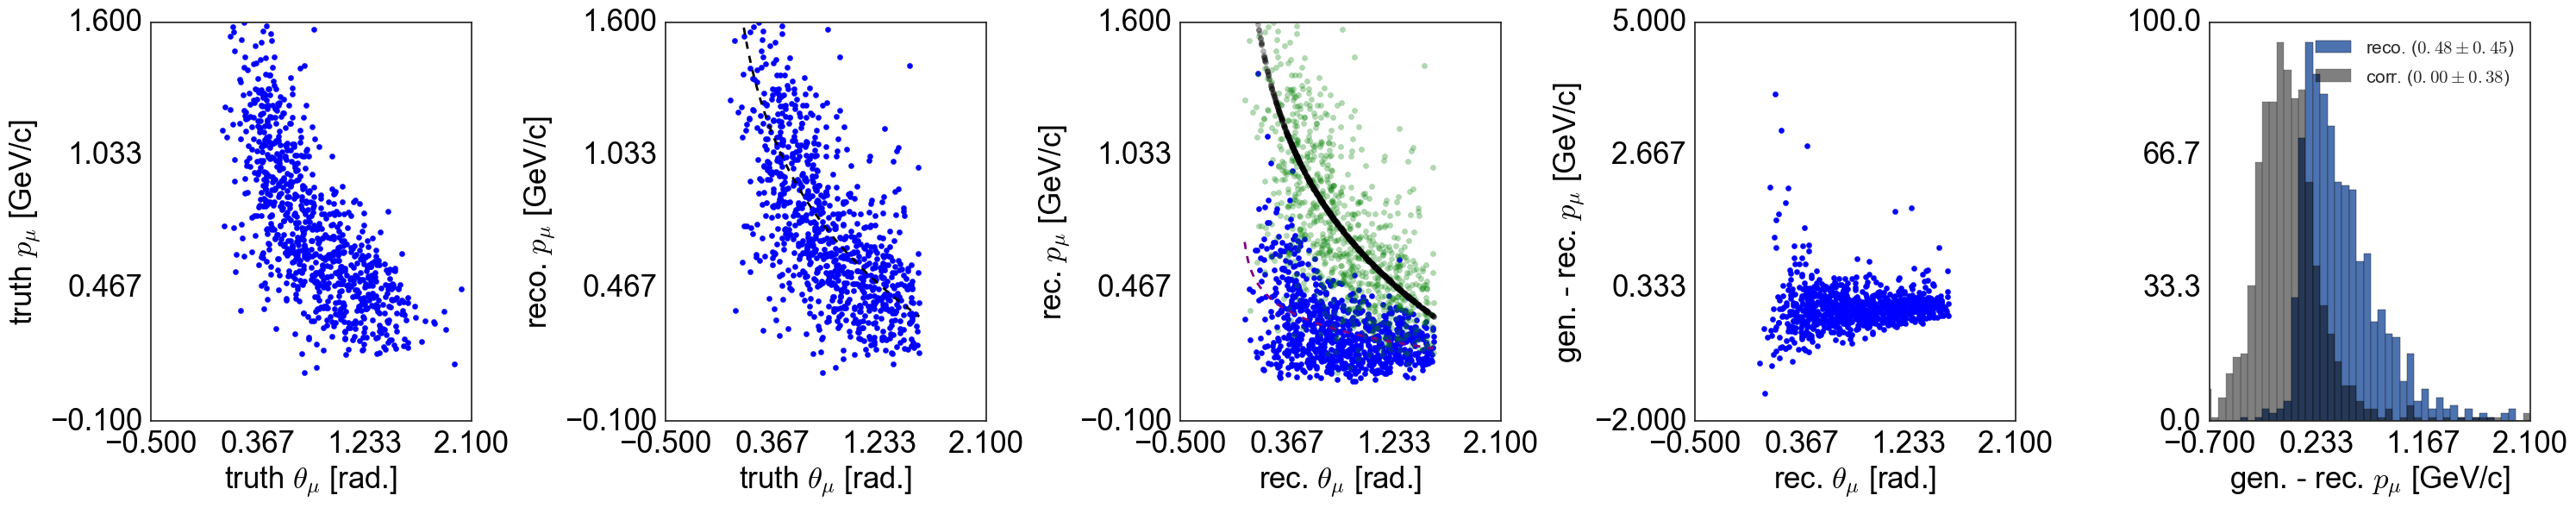

In [9]:
sample = GENIECC1p_in_close_proximity[GENIECC1p_in_close_proximity['reco_CC1p_Pmu_theta']<np.pi/2]
print len(sample),'theta(mu)<pi/2'
correct_momentum(sample=sample,varx='Pmu_theta',vary='Pmu',xlim=(-0.5,2.1)
                 ,x_label='$\\theta_{\\mu}$ [rad.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2.1))

891 theta(mu)<pi/2


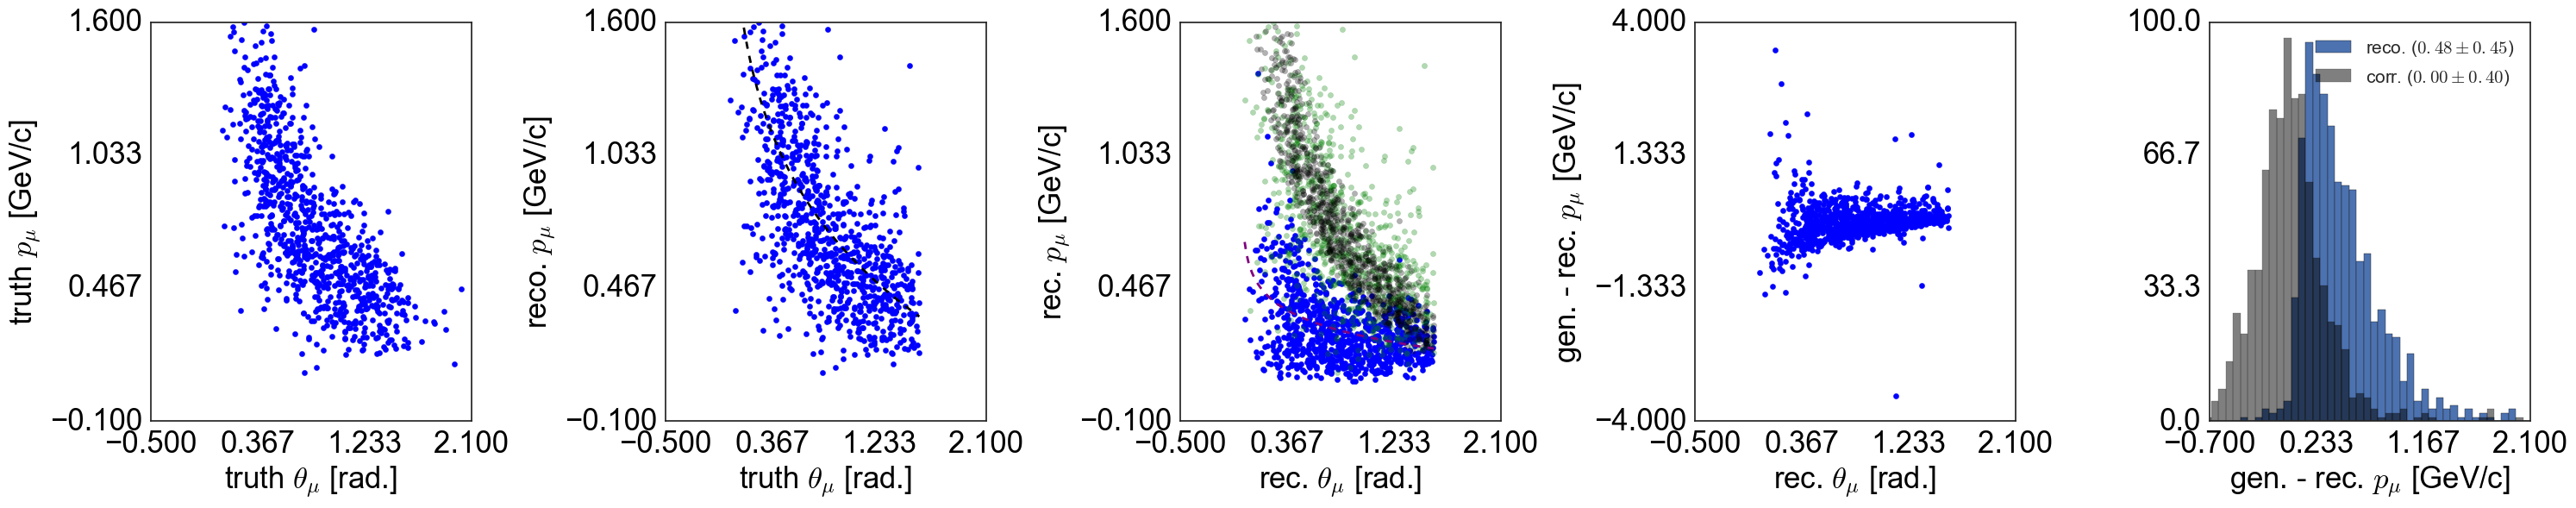

In [12]:
low_theta_mu_sample = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_theta']<np.pi/2]
print len(low_theta_mu_sample),'theta(mu)<pi/2'
correct_momentum(sample=low_theta_mu_sample,varx='Pmu_theta',vary='Pmu',xlim=(-0.5,2.1)
                 ,x_label='$\\theta_{\\mu}$ [rad.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2.1))

891 theta(mu)<pi/2


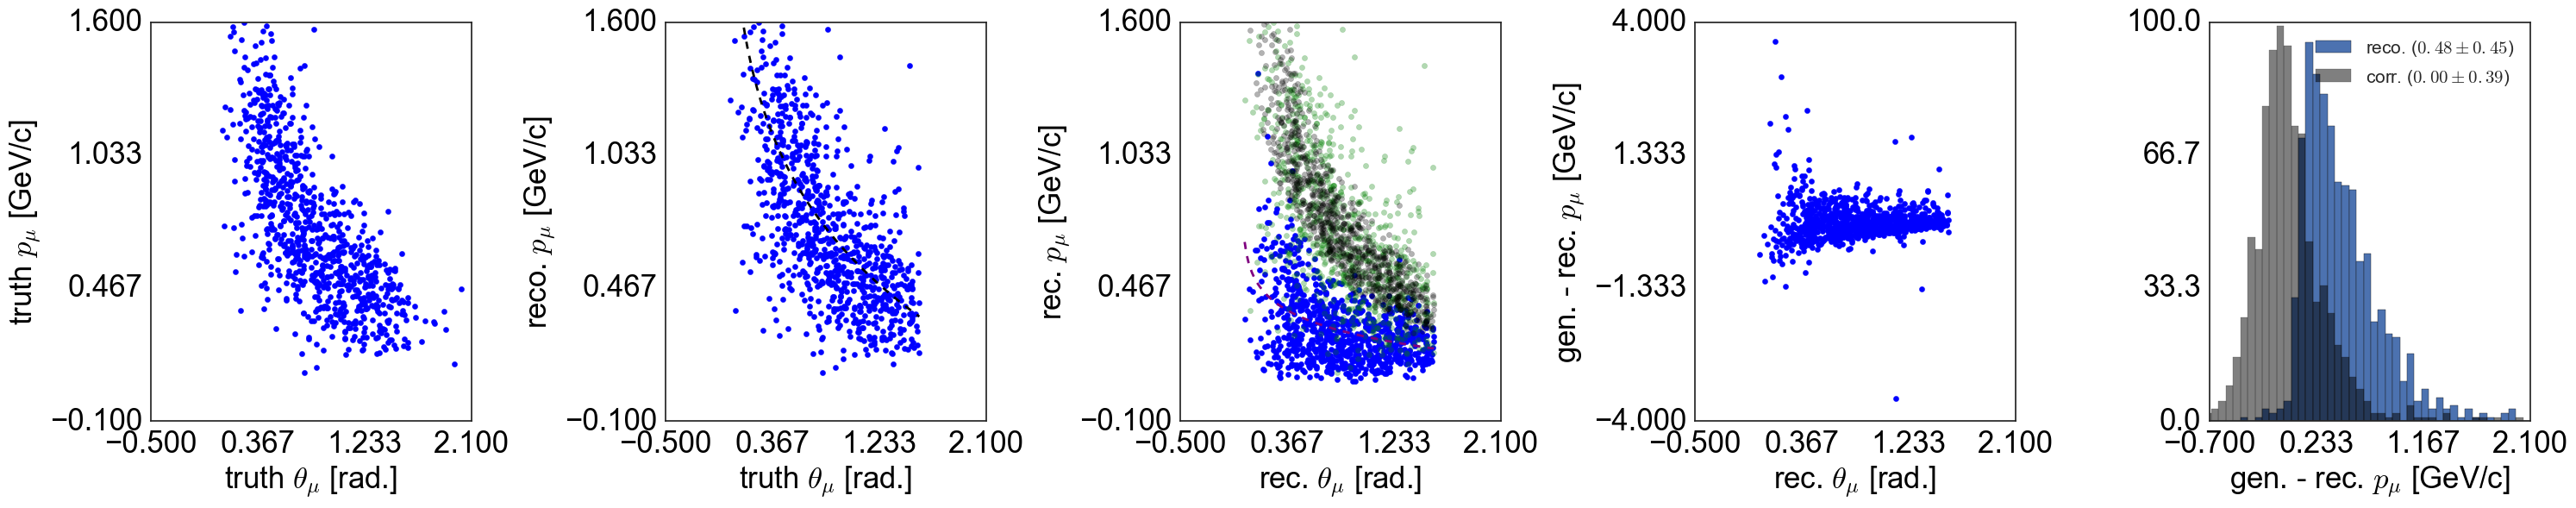

In [14]:
low_theta_mu_sample = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_theta']<np.pi/2]
print len(low_theta_mu_sample),'theta(mu)<pi/2'
correct_momentum(sample=low_theta_mu_sample,varx='Pmu_theta',vary='Pmu'
                 ,x_label='$\\theta_{\\mu}$ [rad.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2.1))

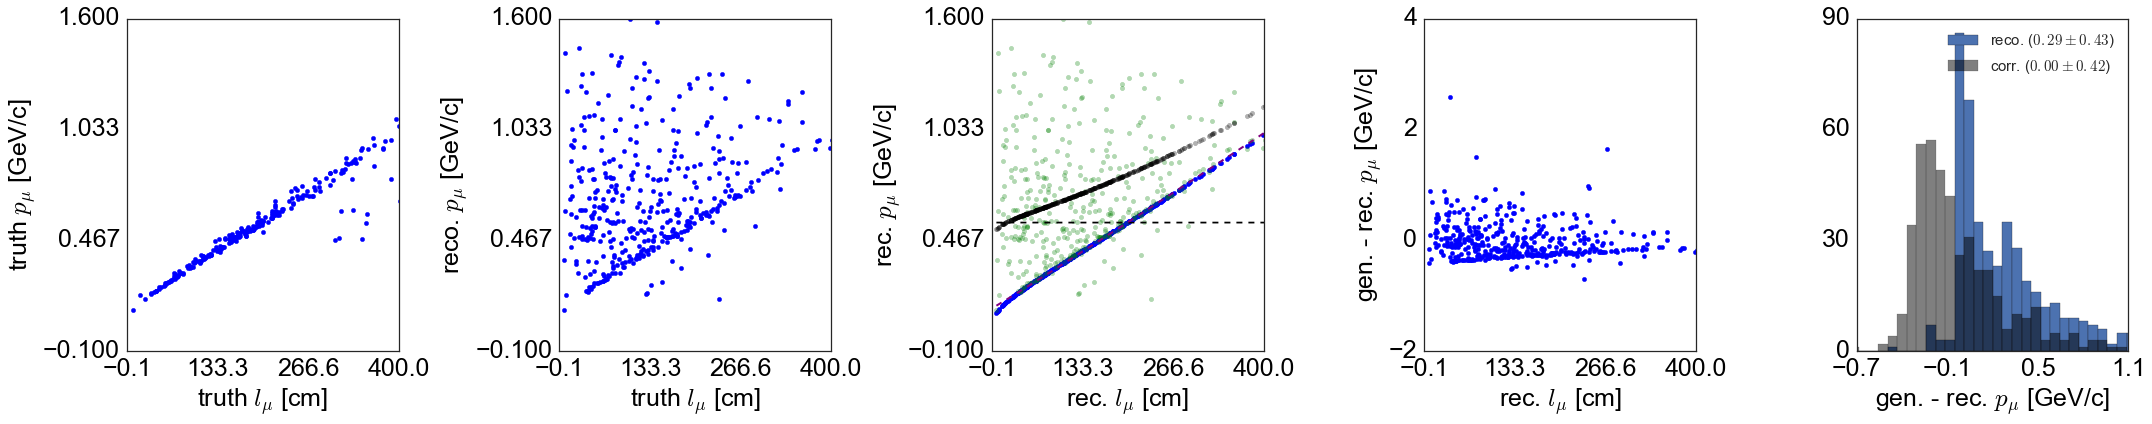

In [97]:
low_theta_mu_sample = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_theta']<np.pi/2]
correct_momentum(sample=low_theta_mu_sample,varx='l_muon',vary='Pmu',xlim=(-0.1,400)
                 ,x_label='$l_{\\mu}$ [cm]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,1.1))

891 theta(mu)<pi/2
239 theta(mu)>pi/2
[ 1.76111671 -0.29398819 -1.19803174]


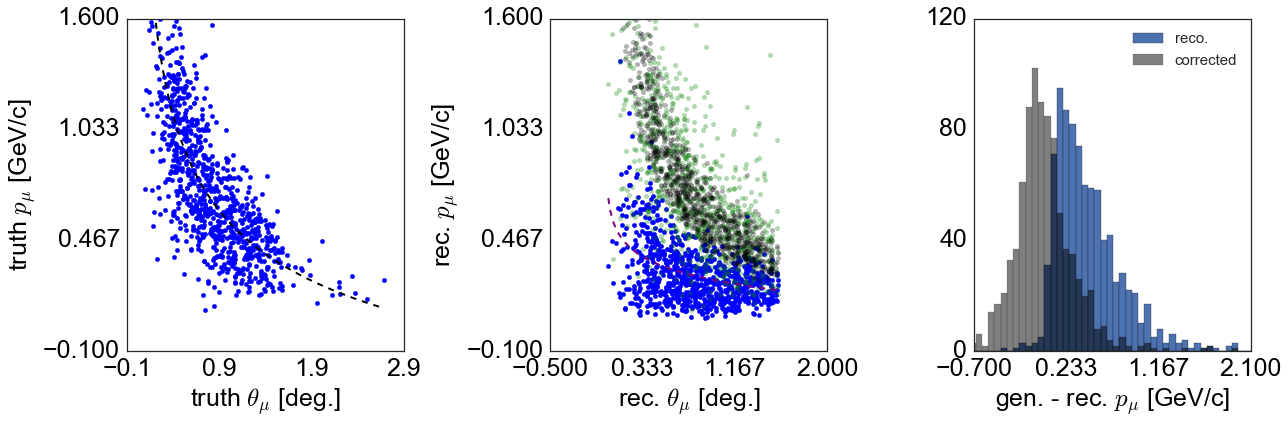

In [11]:
low_theta_mu_sample = GENIECC1pIsVertexReconstructed[GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_theta']<np.pi/2]
print len(low_theta_mu_sample),'theta(mu)<pi/2'
high_theta_mu_low_Pmu_sample = GENIECC1pIsVertexReconstructed[(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_theta']>=np.pi/2)
                                                             &(GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu']<=0.4)]
print len(high_theta_mu_low_Pmu_sample),'theta(mu)>pi/2'
correct_momentum(sample=low_theta_mu_sample,varx='Pmu_theta',vary='Pmu'
                 ,x_label='$\\theta_{\\mu}$ [deg.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.7,2.1))
# correct_momentum(sample=high_theta_mu_low_Pmu_sample,varx='Pmu_theta',vary='Pmu'
#                  ,x_label='$\\theta_{\\mu}$ [deg.]',y_label='$p_{\\mu}$ [GeV/c]',xlim_diff=(-0.5,1.1))

In [ ]:

varx,vary = 'Pmu_theta','Pmu'
fig = plt.figure(figsize=(18,8))

# -- -- --- - -- - -- - - -- - -- - -- - -- - -- - - -- -- - -- -- -- -- -- - - -- -
# good sample
ax = fig.add_subplot(2,3,1)
x,y = good_sample['truth_'+varx],good_sample['truth_'+vary]
ax.scatter(x,y,color='blue')
set_axes(ax,'truth $\\theta_{\\mu}$ [deg.]','truth $p_{\\mu}$ [GeV/c]')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.2)
popt, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt), '--', c='black')

ax = fig.add_subplot(2,3,2)
x,y = good_sample['reco_CC1p_'+varx],good_sample['reco_CC1p_'+vary]
ax.scatter(x,y,color='blue')
popt_reco, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
good_sample['reco_CC1p_'+vary+'_corrected'] = good_sample['reco_CC1p_'+vary] + (exp_func(good_sample['reco_CC1p_'+varx], *popt) - exp_func(good_sample['reco_CC1p_'+varx], *popt_reco))

ax.scatter(good_sample['reco_CC1p_'+varx],good_sample['truth_'+vary],color='green',alpha=0.3)
ax.scatter(good_sample['reco_CC1p_'+varx],good_sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
set_axes(ax,'rec. $\\theta_{\\mu}$ [deg.]','rec. $p_{\\mu}$ [GeV/c]')
plt.plot(x, exp_func(x, *popt), '--', c='black')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.4)

ax = fig.add_subplot(2,3,3)
h,bins,_=ax.hist(good_sample['truth_'+vary]-good_sample['reco_CC1p_'+vary],bins=25,label='reconstructed');
ax.hist(good_sample['truth_'+vary]-good_sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
set_axes(ax,'gen. $p_{\\mu}$ - rec. $p_{\\mu}$ [GeV/c]')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.legend(fontsize=20)

# -- -- --- - -- - -- - - -- - -- - -- - -- - -- - - -- -- - -- -- -- -- -- - - -- -
# bad sample
ax = fig.add_subplot(2,3,4)
x,y = bad_sample['truth_'+varx],bad_sample['truth_'+vary]
ax.scatter(x,y,color='red')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.2)
set_axes(ax,'truth $\\theta_{\\mu}$ [deg.]','truth $p_{\\mu}$ [GeV/c]')

popt, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt), '--', c='black')


ax = fig.add_subplot(2,3,5)
x,y = bad_sample['reco_CC1p_'+varx],bad_sample['reco_CC1p_'+vary]
ax.scatter(x,y,color='red')
popt_reco, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
bad_sample['reco_CC1p_'+vary+'_corrected'] = bad_sample['reco_CC1p_'+vary] + (exp_func(bad_sample['reco_CC1p_'+varx], *popt) - exp_func(bad_sample['reco_CC1p_'+varx], *popt_reco))


ax.scatter(bad_sample['reco_CC1p_'+varx],bad_sample['truth_'+vary],color='green',alpha=0.3)
ax.scatter(bad_sample['reco_CC1p_'+varx],bad_sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
set_axes(ax,'rec. $\\theta_{\\mu}$ [deg.]','rec. $p_{\\mu}$ [GeV/c]')
plt.plot(x, exp_func(x, *popt), '--', c='black')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.4)

ax = fig.add_subplot(2,3,6)
h,bins,_=ax.hist(bad_sample['truth_'+vary]-bad_sample['reco_CC1p_'+vary],bins=np.linspace(-2,2,35),label='reconstructed',color='red');
ax.hist(bad_sample['truth_'+vary]-bad_sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
set_axes(ax,'gen. $p_{\\mu}$ - rec. $p_{\\mu}$ [GeV/c]')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
plt.tight_layout()

Pp_corrected = Pp+ (0.623295/sqrt(9.992560 * Pp_theta) + 0.451352) - (0.236163/sqrt(19.029820 * Pp_theta) + 0.465819)
0.175856253692 0.0144576278296
0.209786946272 0.203942212466


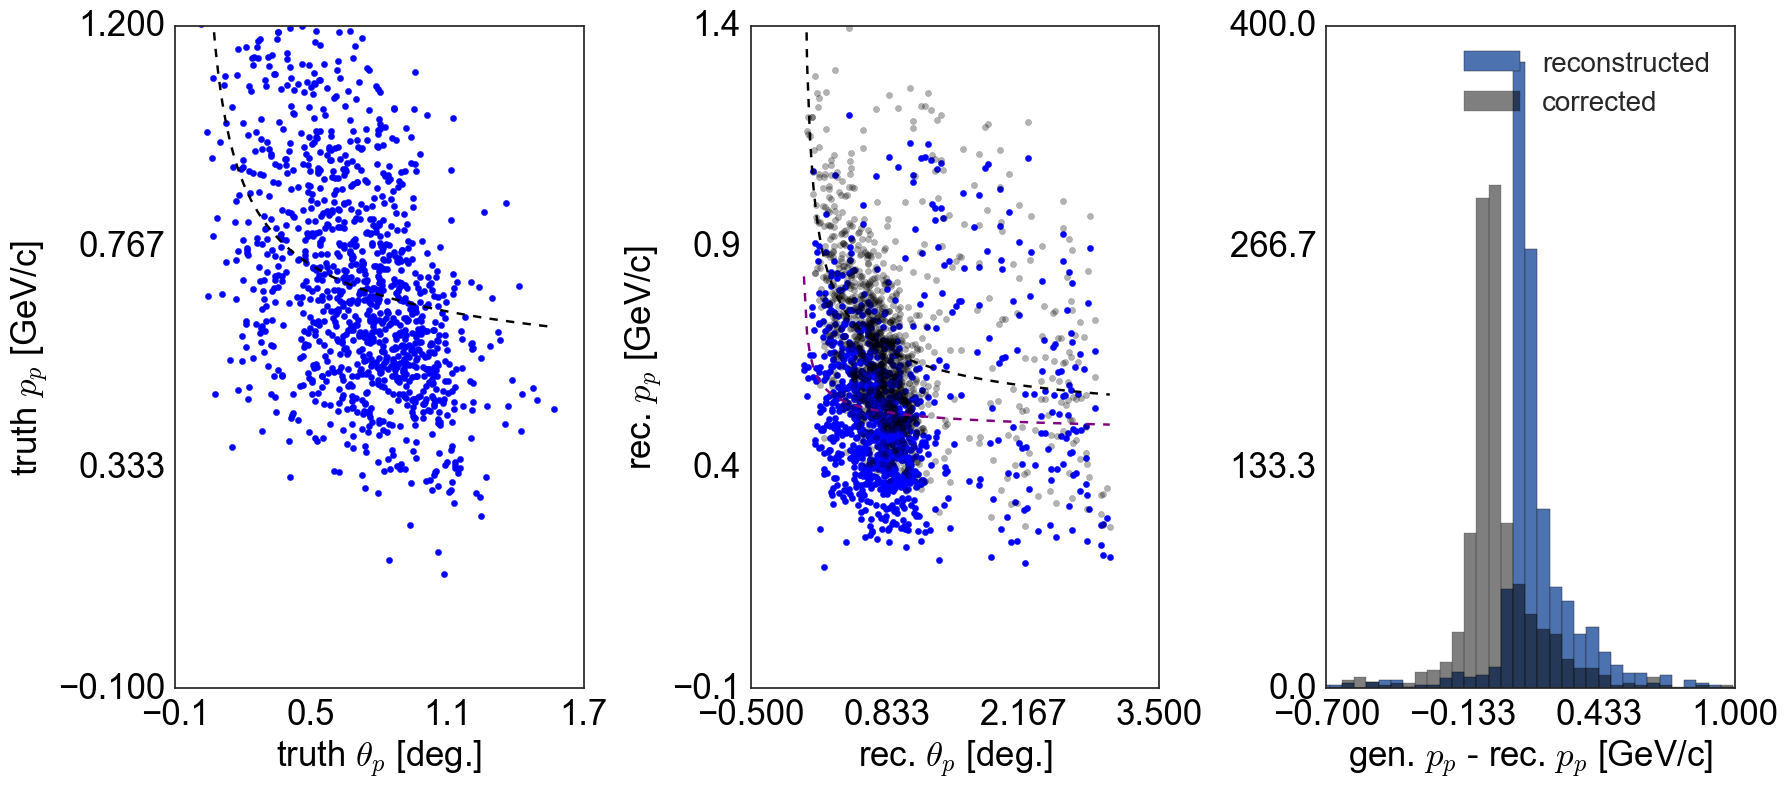

In [404]:
from scipy.optimize import curve_fit
varx,vary = 'Pp_theta','Pp'
fig = plt.figure(figsize=(18,8))

# # -- - - - -- - -- - -- - -- -- - -- -
# # good sample
# ax = fig.add_subplot(2,3,1)
# x,y = good_sample['truth_'+varx],good_sample['truth_'+vary]
# ax.scatter(x,y,color='blue')
# set_axes(ax,'truth $\\theta_{p}$ [deg.]','truth $p_{p}$ [GeV/c]')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# ax.set_ylim(-0.1,1.2)
# popt, pcov = curve_fit(exp_func, x, y)
# x = np.linspace(np.min(x), np.max(x), 100)
# plt.plot(x, exp_func(x, *popt), '--', c='black')

# ax = fig.add_subplot(2,3,2)
# x,y = good_sample['reco_CC1p_'+varx],good_sample['reco_CC1p_'+vary]
# ax.scatter(x,y,color='blue')
# popt_reco, pcov = curve_fit(exp_func, x, y)
# x = np.linspace(np.min(x), np.max(x), 100)
# plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
# good_sample['reco_CC1p_'+vary+'_corrected'] = good_sample['reco_CC1p_'+vary] + (exp_func(good_sample['reco_CC1p_'+varx], *popt) - exp_func(good_sample['reco_CC1p_'+varx], *popt_reco))

# ax.scatter(good_sample['reco_CC1p_'+varx],good_sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
# set_axes(ax,'rec. $\\theta_{p}$ [deg.]','rec. $p_{p}$ [GeV/c]')
# plt.plot(x, exp_func(x, *popt), '--', c='black')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# ax.set_ylim(-0.1,1.4)

# ax = fig.add_subplot(2,3,3)
# h,bins,_=ax.hist(good_sample['truth_'+vary]-good_sample['reco_CC1p_'+vary],bins=25,label='reconstructed');
# ax.hist(good_sample['truth_'+vary]-good_sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
# set_axes(ax,'gen. $p_{p}$ - rec. $p_{p}$ [GeV/c]')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# ax.legend(fontsize=20)

# # -- -- --- - -- - -- - - -- - -- - -- - -- - -- - - -- -- - -- -- -- -- -- - - -- -
# # bad sample
# ax = fig.add_subplot(2,3,4)
# x,y = bad_sample['truth_'+varx],bad_sample['truth_'+vary]
# ax.scatter(x,y,color='red')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# ax.set_ylim(-0.1,1.2)
# set_axes(ax,'truth $\\theta_{p}$ [deg.]','truth $p_{p}$ [GeV/c]')

# popt, pcov = curve_fit(exp_func, x, y)
# x = np.linspace(np.min(x), np.max(x), 100)
# plt.plot(x, exp_func(x, *popt), '--', c='black')


# ax = fig.add_subplot(2,3,5)
# x,y = bad_sample['reco_CC1p_'+varx],bad_sample['reco_CC1p_'+vary]
# ax.scatter(x,y,color='red')
# popt_reco, pcov = curve_fit(exp_func, x, y)
# x = np.linspace(np.min(x), np.max(x), 100)
# plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
# bad_sample['reco_CC1p_'+vary+'_corrected'] = bad_sample['reco_CC1p_'+vary] + (exp_func(bad_sample['reco_CC1p_'+varx], *popt) - exp_func(bad_sample['reco_CC1p_'+varx], *popt_reco))

# ax.scatter(bad_sample['reco_CC1p_'+varx],bad_sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
# set_axes(ax,'rec. $\\theta_{p}$ [deg.]','rec. $p_{p}$ [GeV/c]')
# plt.plot(x, exp_func(x, *popt), '--', c='black')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# ax.set_ylim(-0.1,1.2)

# ax = fig.add_subplot(2,3,6)
# h,bins,_=ax.hist(bad_sample['truth_'+vary]-bad_sample['reco_CC1p_'+vary],bins=np.linspace(-2,2,35),label='reconstructed',color='red');
# ax.hist(bad_sample['truth_'+vary]-bad_sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
# set_axes(ax,'gen. $p_{p}$ - rec. $p_{p}$ [GeV/c]')
# # ax.legend(fontsize=20,loc='best')
# ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
# plt.tight_layout()




# --- - - --- -- -- --
# the two samples together, since in data we can not separate between them
fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,3,1)
x,y = sample['truth_'+varx],sample['truth_'+vary]
ax.scatter(x,y,color='blue')
set_axes(ax,'truth $\\theta_{p}$ [deg.]','truth $p_{p}$ [GeV/c]')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.2)
popt, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt), '--', c='black')

ax = fig.add_subplot(1,3,2)
x,y = sample['reco_CC1p_'+varx],sample['reco_CC1p_'+vary]
ax.scatter(x,y,color='blue')
popt_reco, pcov = curve_fit(exp_func, x, y)
x = np.linspace(np.min(x), np.max(x), 100)
plt.plot(x, exp_func(x, *popt_reco), '--', c='purple')
for i,row in sample.iterrows():
    if row['reco_CC1p_'+varx]<1.6:
        row['reco_CC1p_'+vary+'_corrected'] = row['reco_CC1p_'+vary] + (exp_func(row['reco_CC1p_'+varx], *popt) - exp_func(row['reco_CC1p_'+varx], *popt_reco))
    else:
        row['reco_CC1p_'+vary+'_corrected'] = row['reco_CC1p_'+vary]
sample['reco_CC1p_'+vary+'_corrected'] = sample['reco_CC1p_'+vary]  + ((exp_func(sample['reco_CC1p_'+varx], *popt) 
                                                                        - exp_func(sample['reco_CC1p_'+varx], *popt_reco)))
print vary+"_corrected = "+vary + "+ (%f/sqrt(%f * %s) + %f)"%(popt[0],popt[1],varx,popt[2])  + " - (%f/sqrt(%f * %s) + %f)"%(popt_reco[0],popt_reco[1],varx,popt_reco[2])


ax.scatter(sample['reco_CC1p_'+varx],sample['reco_CC1p_'+vary+'_corrected'],color='black',alpha=0.3)
set_axes(ax,'rec. $\\theta_{p}$ [deg.]','rec. $p_{p}$ [GeV/c]')
plt.plot(x, exp_func(x, *popt), '--', c='black')
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.set_ylim(-0.1,1.4)

ax = fig.add_subplot(1,3,3)
h,bins,_=ax.hist(sample['truth_'+vary]-sample['reco_CC1p_'+vary],bins=np.linspace(-1.5,1.5,60),label='reconstructed');
ax.hist(sample['truth_'+vary]-sample['reco_CC1p_'+vary+'_corrected'],bins=bins,color='black',label='corrected',alpha=0.5);
set_axes(ax,'gen. $p_{p}$ - rec. $p_{p}$ [GeV/c]')
ax.set_xlim(-0.7,1)
ax.xaxis.set_major_locator(LinearLocator(4));ax.yaxis.set_major_locator(LinearLocator(4))
ax.legend(fontsize=20)
plt.tight_layout()
print np.mean(sample['truth_'+vary]-sample['reco_CC1p_'+vary]),np.mean(sample['truth_'+vary]-sample['reco_CC1p_'+vary+'_corrected'])
print np.std(sample['truth_'+vary]-sample['reco_CC1p_'+vary]),np.std(sample['truth_'+vary]-sample['reco_CC1p_'+vary+'_corrected'])

In [398]:
sample = pd.concat([good_sample,bad_sample])
sample['reco_CC1p_Emu_corrected'] = np.sqrt( np.square(sample['reco_CC1p_Pmu_corrected']) + 0.106*0.106 )
sample['reco_CC1p_Ev_corrected_mu'] = sample['reco_CC1p_Ep'] - 0.938 + sample['reco_CC1p_Emu_corrected']
sample['reco_CC1p_Ep_corrected'] = np.sqrt( np.square(sample['reco_CC1p_Pp_corrected']) + 0.938*0.938 )
sample['reco_CC1p_Ev_corrected_p_mu'] = sample['reco_CC1p_Ep_corrected'] - 0.938 + sample['reco_CC1p_Emu_corrected']

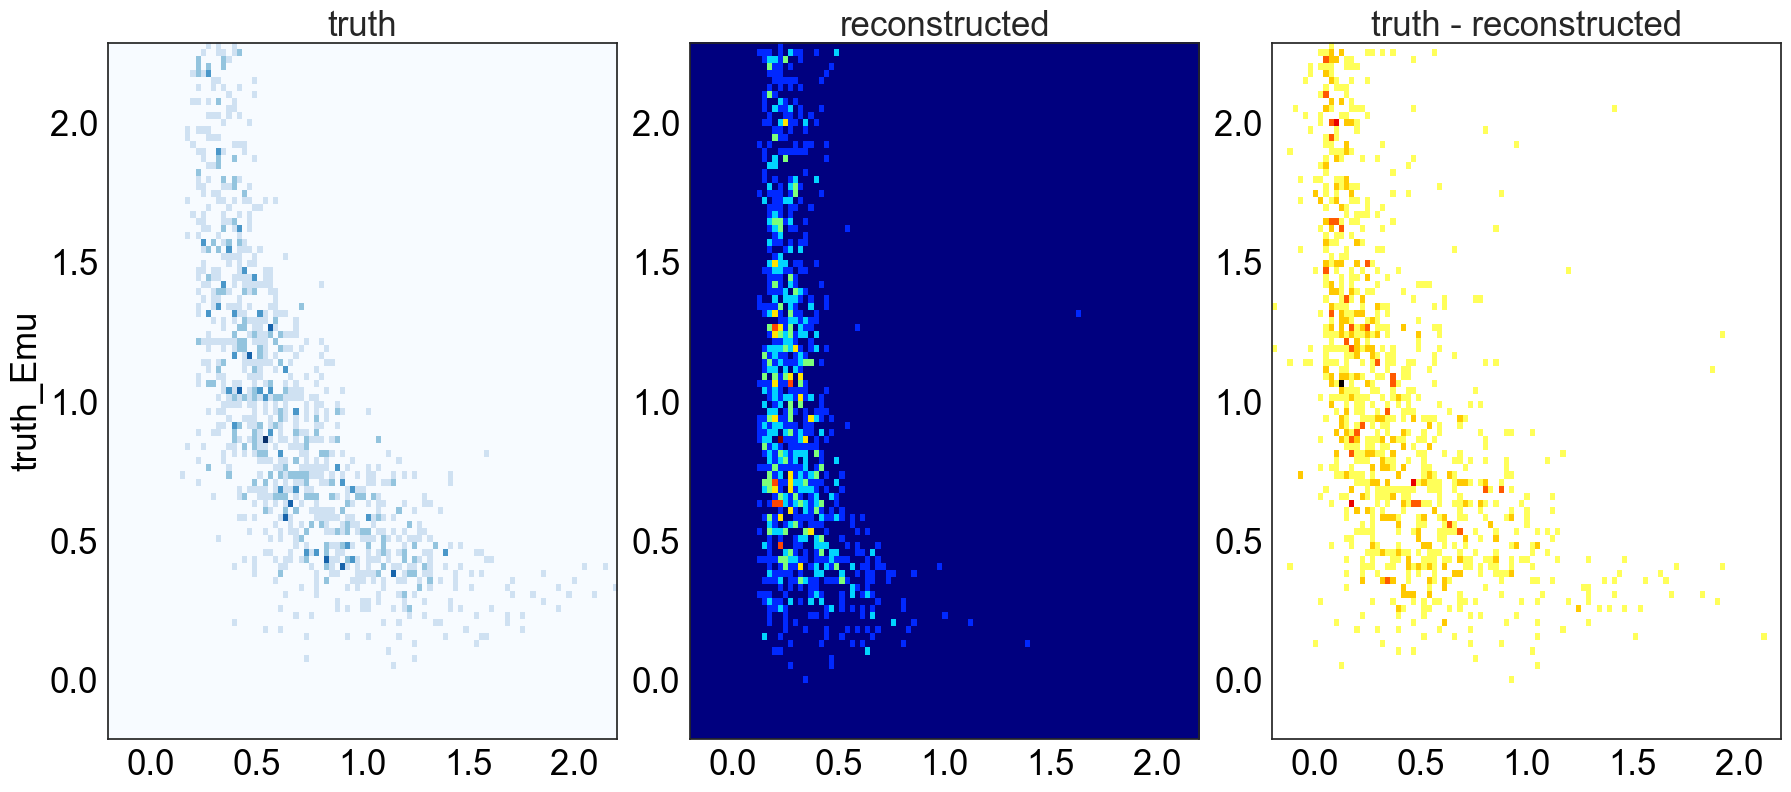

In [162]:
x_corr_var = GENIECC1pIsVertexReconstructed['truth_Pmu_theta']
x_reco_corr_var = GENIECC1pIsVertexReconstructed['reco_CC1p_Pmu_theta']
bins=(np.linspace(-0.2,2.2,100),np.linspace(-0.2,2.3,100))

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,3,1)
ax.set_title('truth',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['truth_Emu'],x_corr_var,
             bins=bins,ax=ax,cmap='Blues')
set_axes(ax,'',corr_var)
ax = fig.add_subplot(1,3,2)
ax.set_title('reconstructed',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['reco_CC1p_Emu'],x_reco_corr_var,
             bins=bins,ax=ax,cmap='jet')
ax = fig.add_subplot(1,3,3)
ax.set_title('truth - reconstructed',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['truth_Emu']-GENIECC1pIsVertexReconstructed['reco_CC1p_Emu'],            
             x_reco_corr_var,
             bins=bins,ax=ax)
plt.tight_layout()

$E_{\mu}$=1.000 $E_{\nu}$ + -0.200


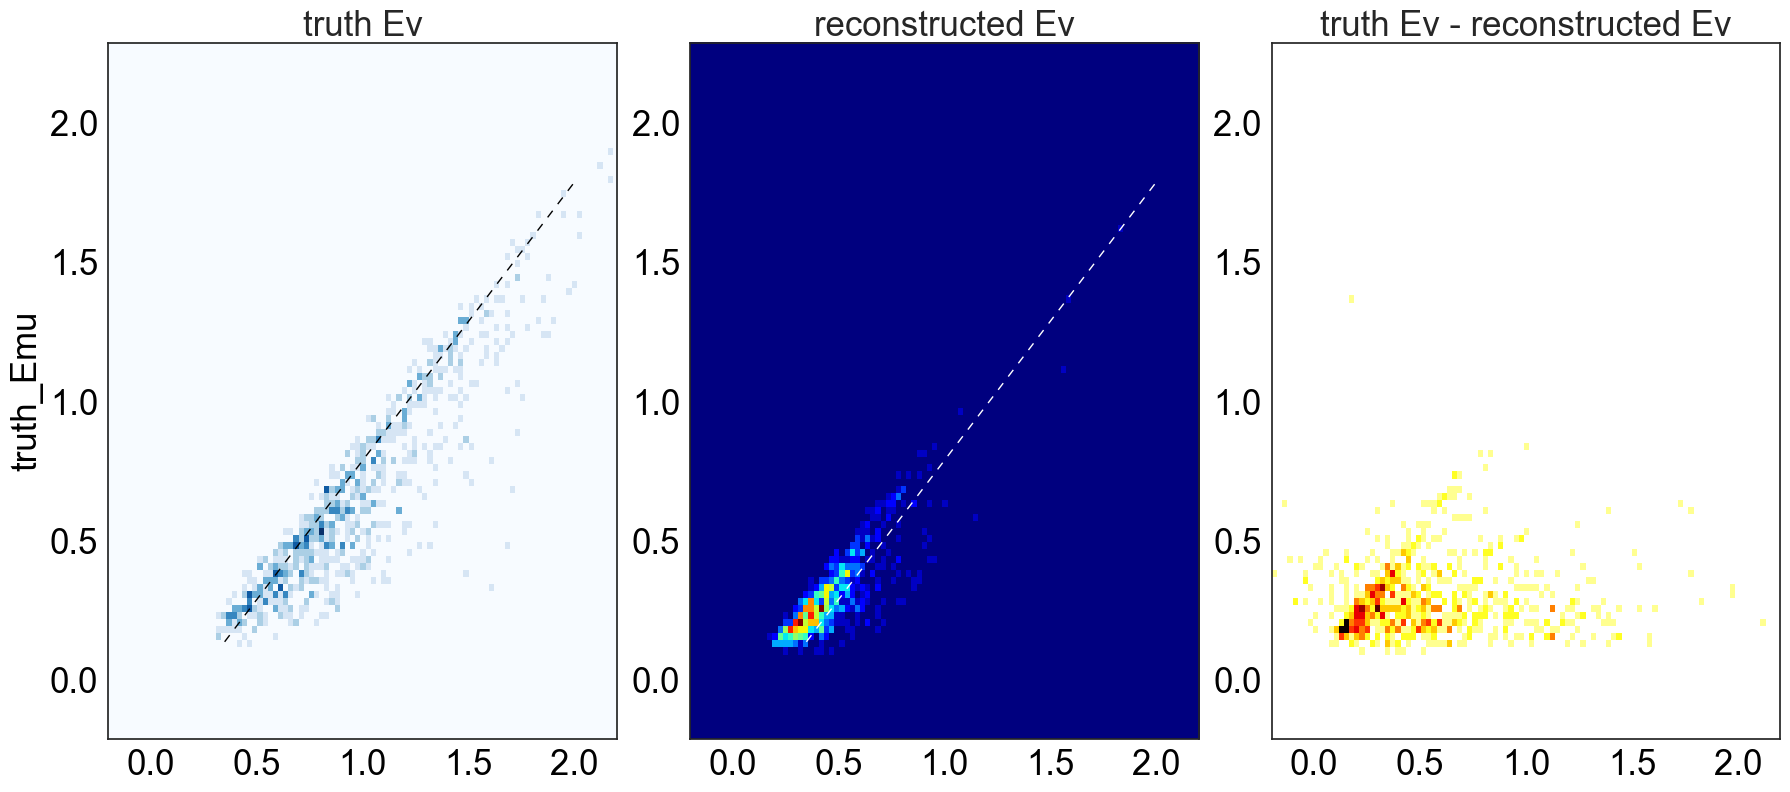

In [115]:
x_corr_var = GENIECC1pIsVertexReconstructed['truth_Emu']
x_reco_corr_var = GENIECC1pIsVertexReconstructed['reco_CC1p_Emu']
bins=(np.linspace(-0.2,2.2,100),np.linspace(-0.2,2.3,100))

fig = plt.figure(figsize=(18,8))
ax = fig.add_subplot(1,3,1)
ax.set_title('truth Ev',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['truth_Ev'],x_corr_var,
             bins=bins,ax=ax,cmap='Blues')
set_axes(ax,'',corr_var)
x_array,y_array=[0.35,2.],[0.15,1.8]
plt.plot(x_array,y_array,'--',color='black',linewidth=1)
slope,intercept = find_a_straight_line(x_array,y_array)
print "$E_{\\mu}$=%.3f $E_{\\nu}$ + %.3f"%(slope,intercept)
ax = fig.add_subplot(1,3,2)
ax.set_title('reconstructed Ev',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE'],x_reco_corr_var,
             bins=bins,ax=ax,cmap='jet')
x_array,y_array=[0.35,2.],[0.15,1.8]
plt.plot(x_array,y_array,'--',color='white',linewidth=1)
ax = fig.add_subplot(1,3,3)
ax.set_title('truth Ev - reconstructed Ev',fontsize=25)
plot_2d_hist(GENIECC1pIsVertexReconstructed['truth_Ev']-GENIECC1pIsVertexReconstructed['reco_CC1p_Ev_fromE'],            
             x_reco_corr_var,
             bins=bins,ax=ax)
# plt.plot([0.,0.0],[0.3,1.3],'--',color='black',linewidth=1)
plt.tight_layout()

Ev=0.925 $E_{\mu}*E_p$ + 0.157


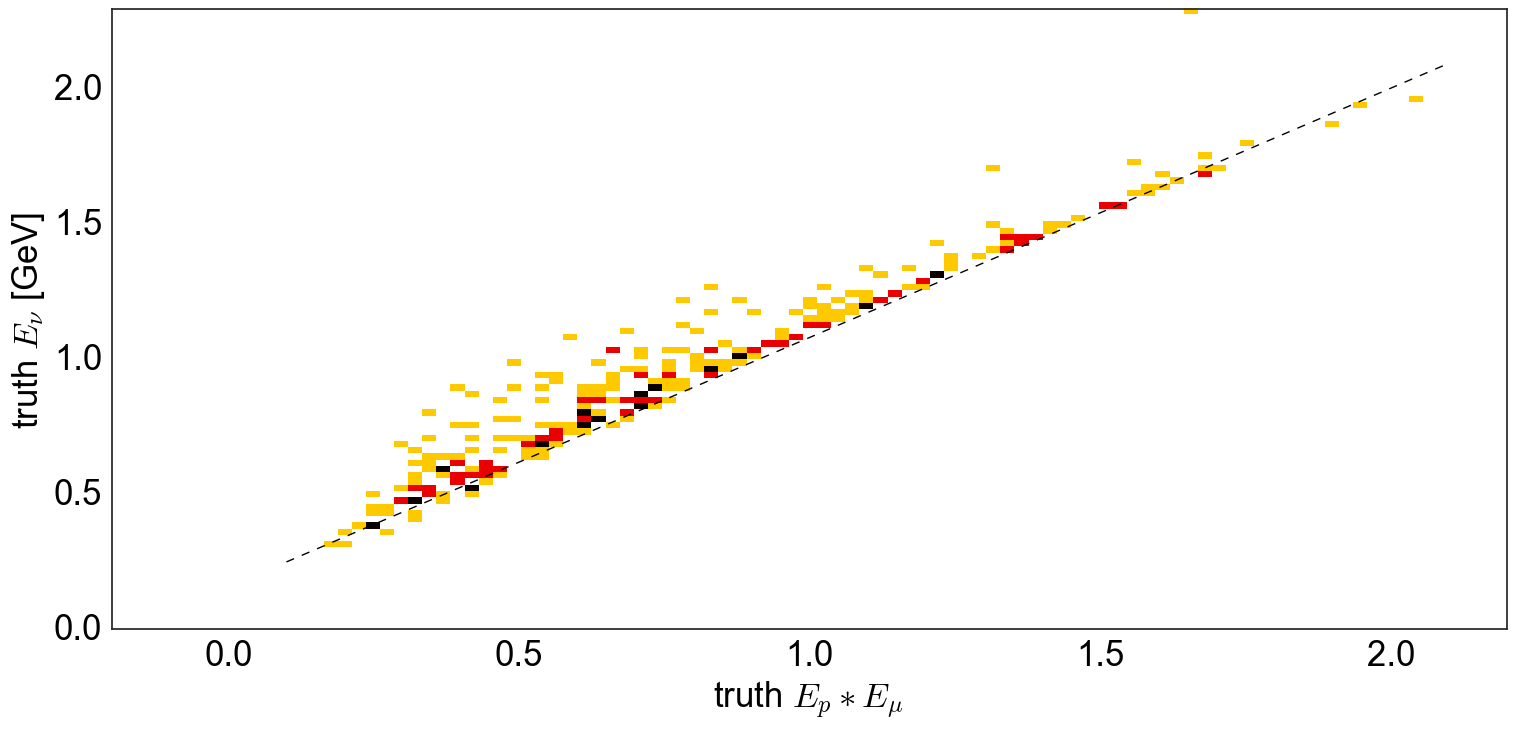

In [103]:
fig,ax = plt.subplots(figsize=(18,8))
plot_2d_hist( GENIECC1pIsVertexReconstructed.truth_Emu*GENIECC1pIsVertexReconstructed.truth_Ep,
             GENIECC1pIsVertexReconstructed['truth_Ev'],             
             bins=(np.linspace(-0.2,2.2,100),np.linspace(0,2.3,100)),ax=ax)
set_axes(ax,'truth $E_{p} * E_{\\mu}$ ','truth $E_{\\nu}$ [GeV]')
x_array,y_array=[0.1,2.1],[0.25,2.1]
plt.plot(x_array,y_array,'--',color='black',linewidth=1)
slope,intercept = find_a_straight_line(x_array,y_array)
print "Ev=%.3f $E_{\\mu}*E_p$ + %.3f"%(slope,intercept)